In [26]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from pathlib import Path
from GaugeLocator import generate_flow_at_gauges

## Set the path to the directory containing .csv files

In [28]:
PATH_TO_CSV_OUTPUTS='./outputs'
PATH_TO_PF_OUTPUTS='/home/arezaii/projects/parflow/snake_river_shape_outs/parking_lot_sim'
generate_flow_at_gauges(PATH_TO_PF_OUTPUTS, PATH_TO_CSV_OUTPUTS)

## Set the path to write images of each graph

In [29]:
PATH_TO_WRITE_PNGS='./images'
Path(PATH_TO_WRITE_PNGS).mkdir(parents=True, exist_ok=True)

## Collect all the .csv files

In [30]:
outputs = glob.glob(os.path.join(PATH_TO_CSV_OUTPUTS , '*.csv'))
#outputs ## Uncomment to display intermediate data

## Create pandas dataframes for each of the output files

In [31]:
parflow_dataframes = [pd.read_csv(out,sep='\t') for out in outputs]
#parflow_dataframes ## Uncomment to display intermediate data

## Plot the simulated flow at each gauge location

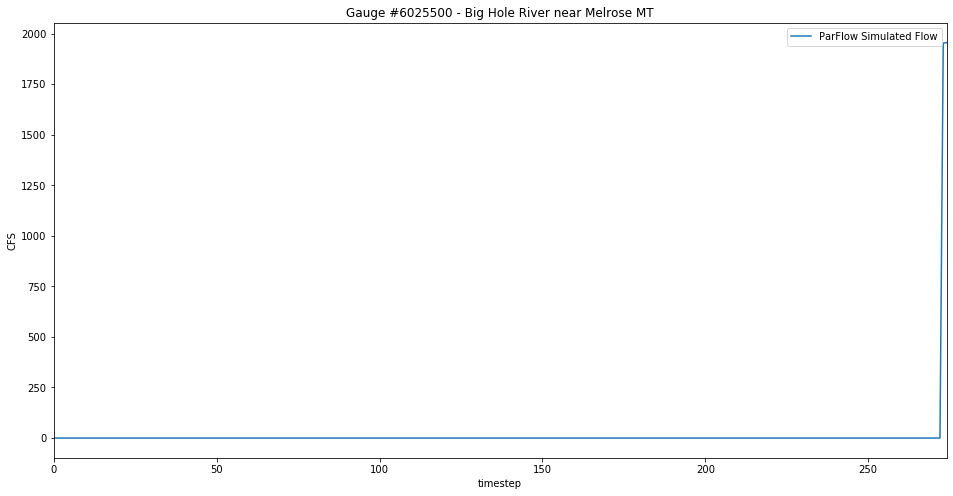

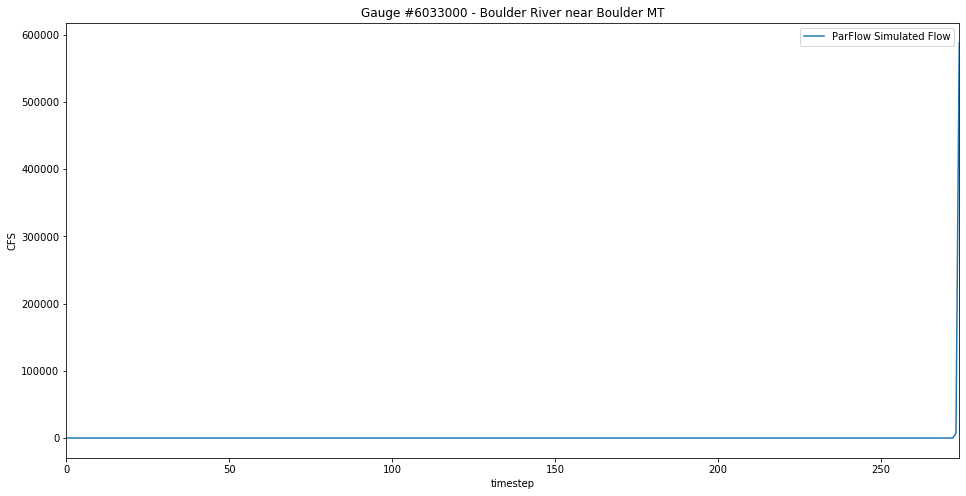

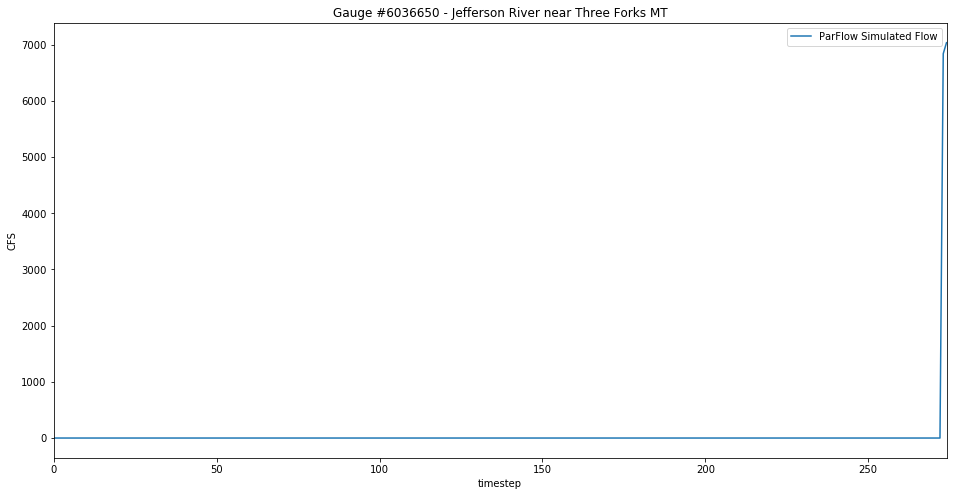

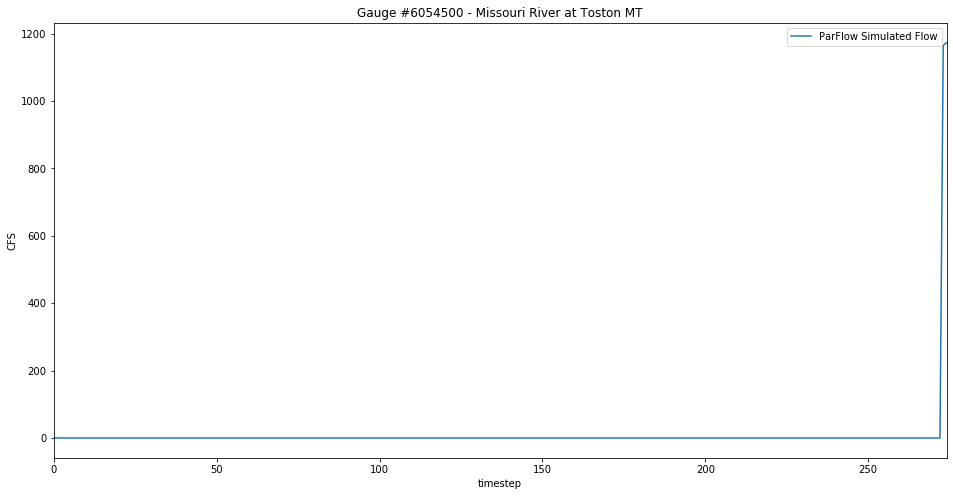

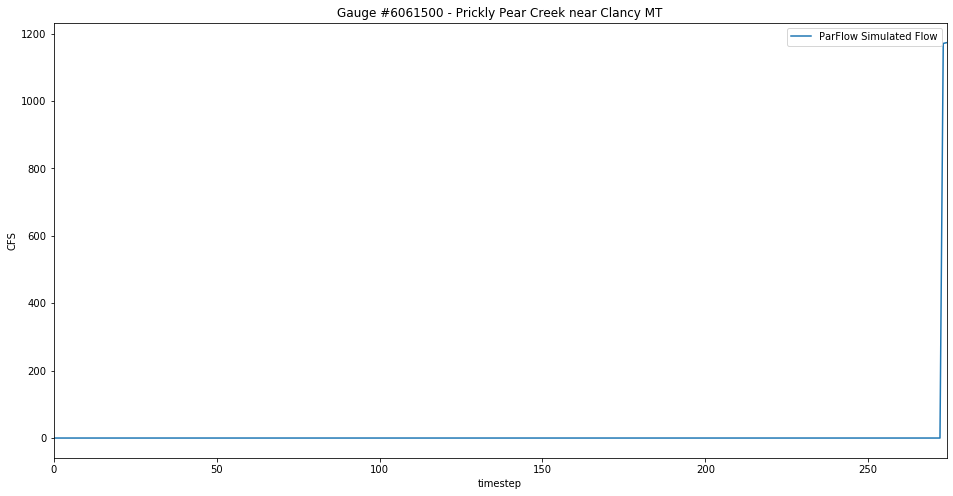

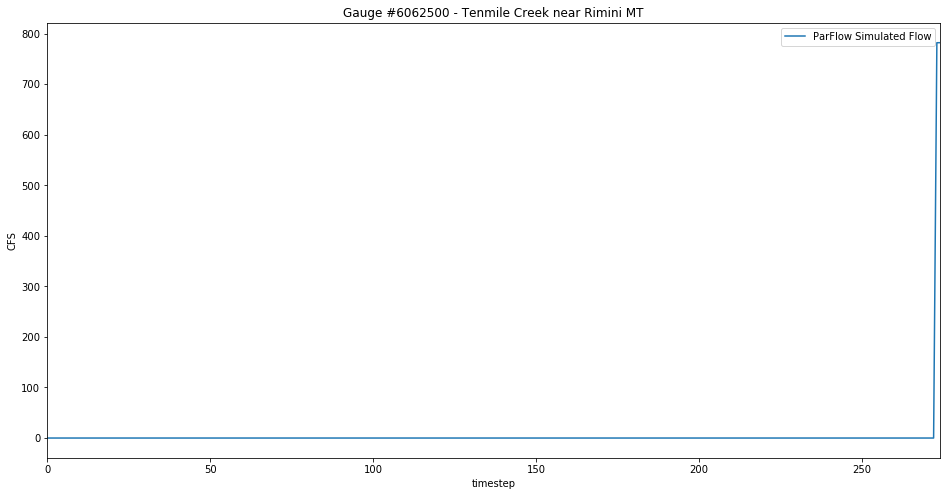

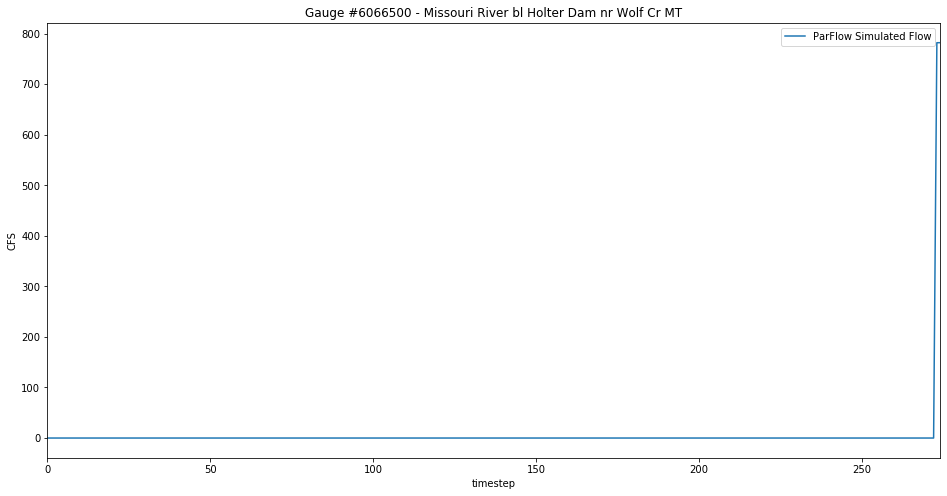

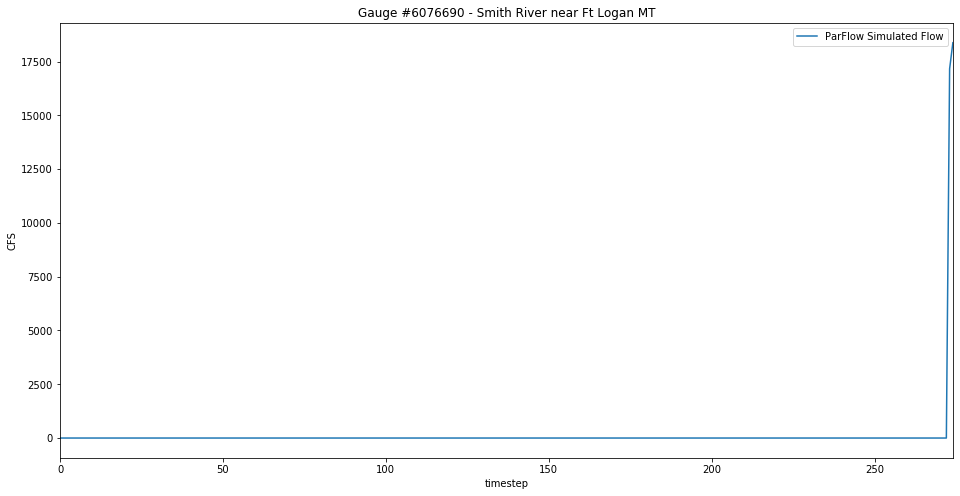

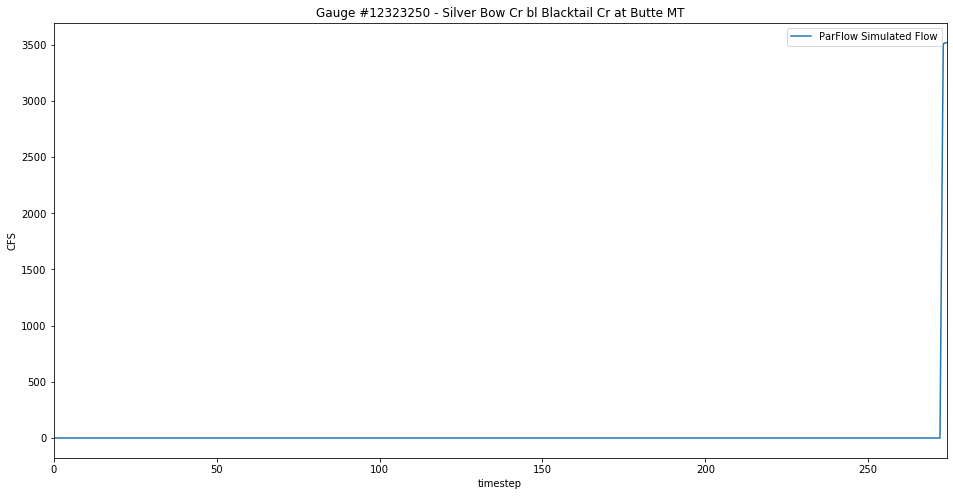

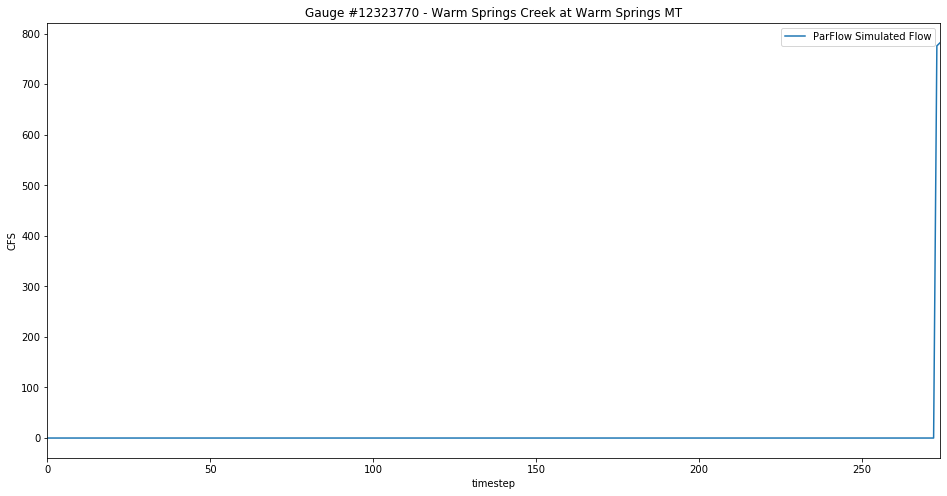

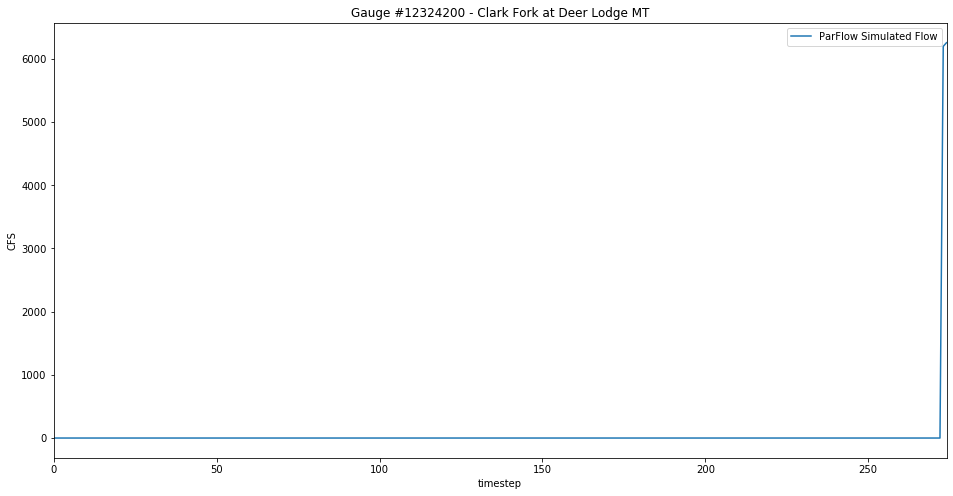

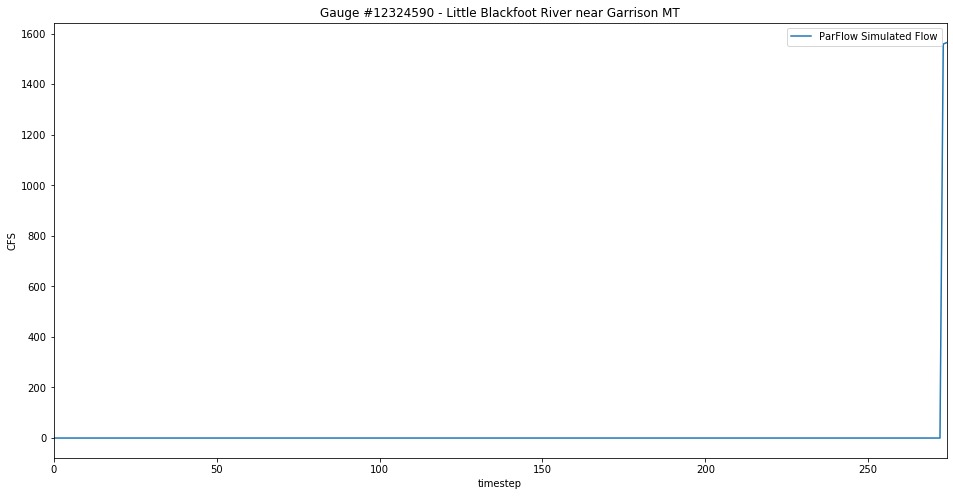

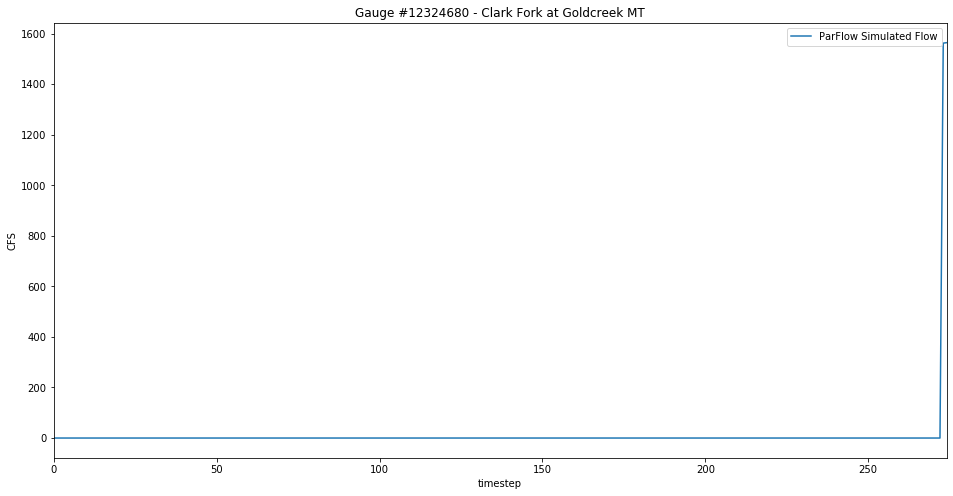

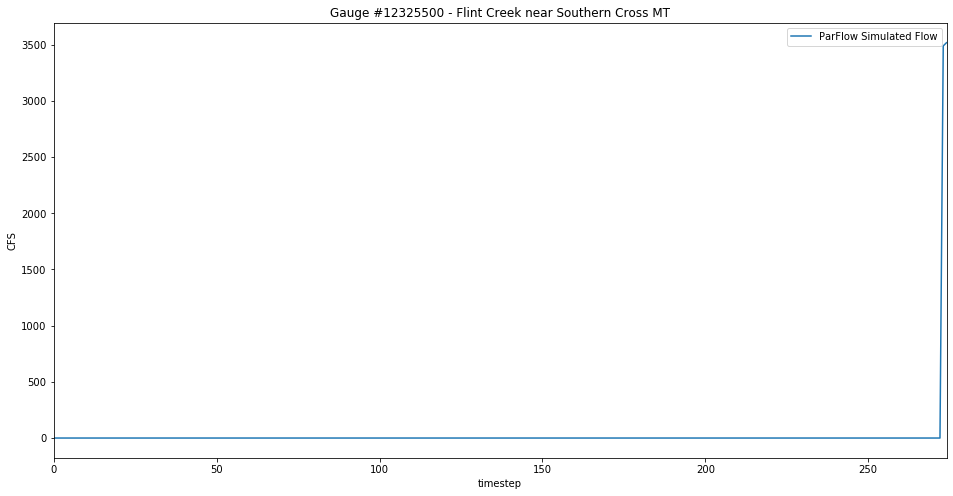

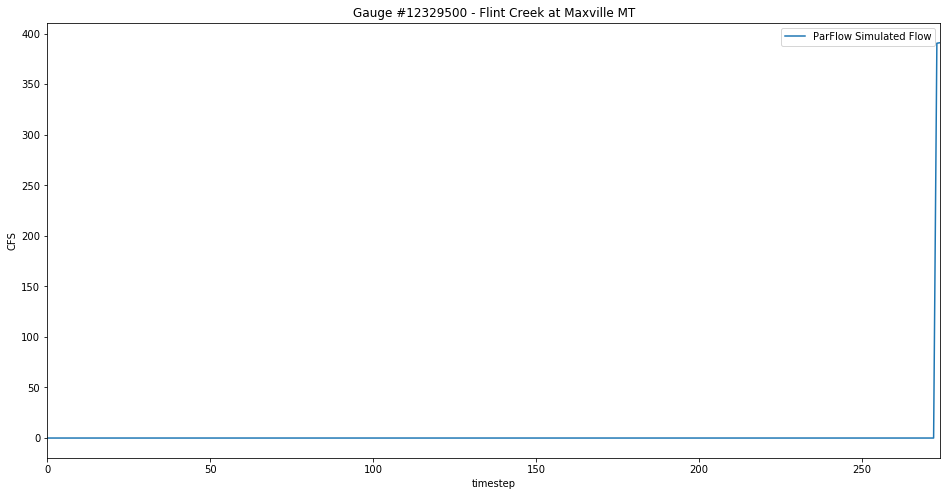

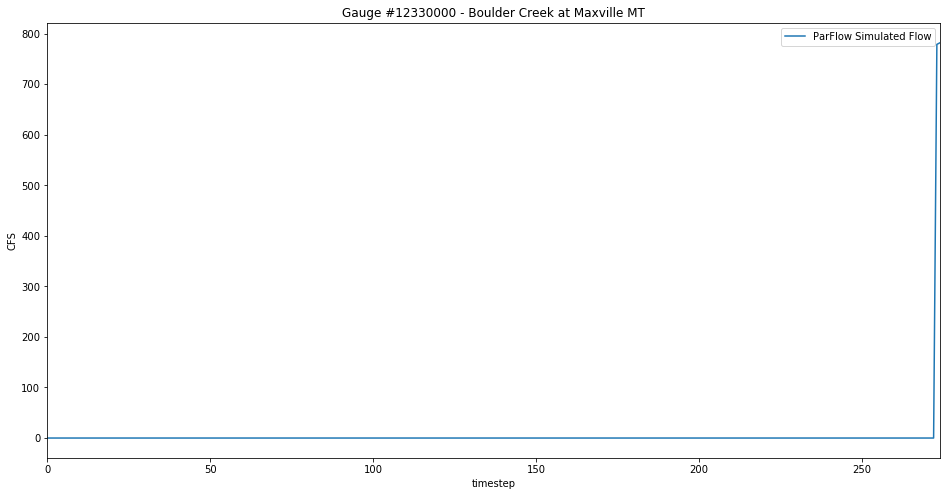

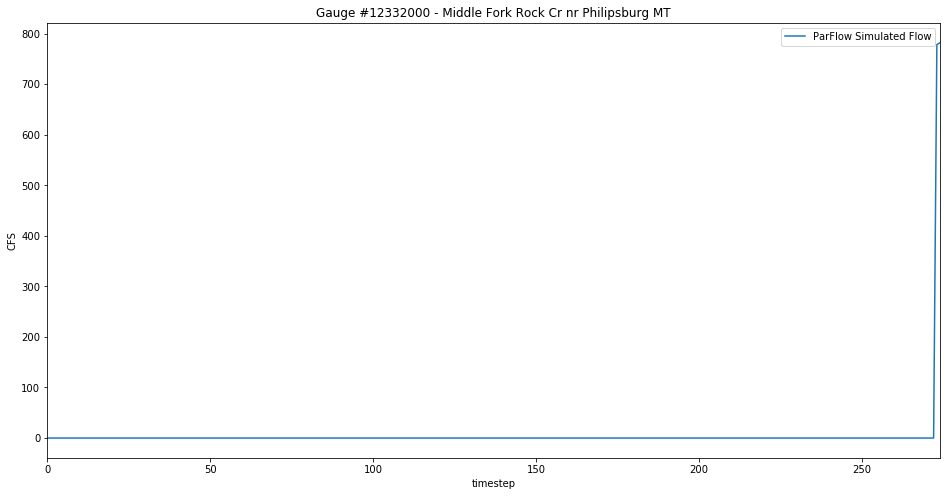

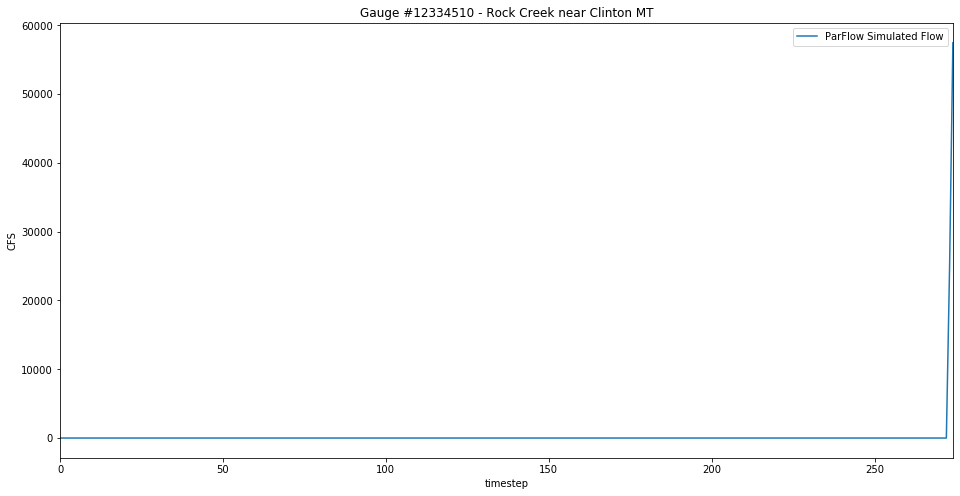

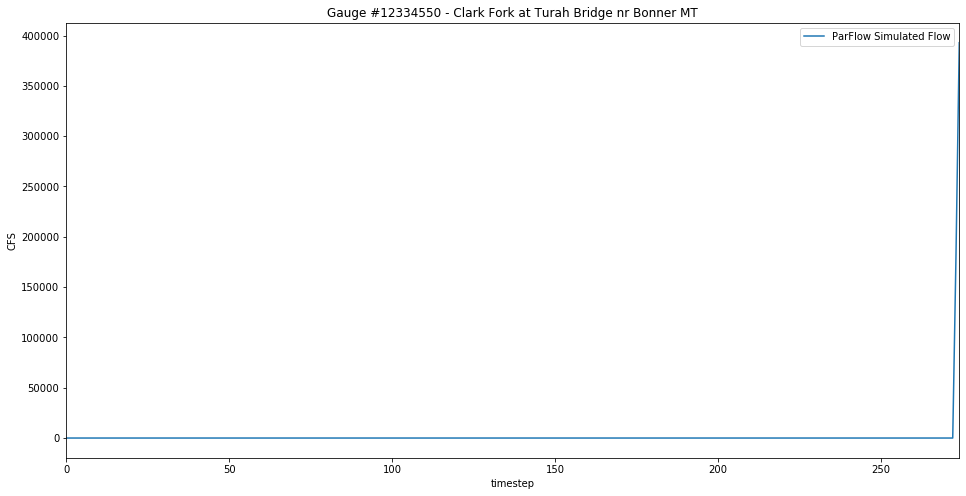

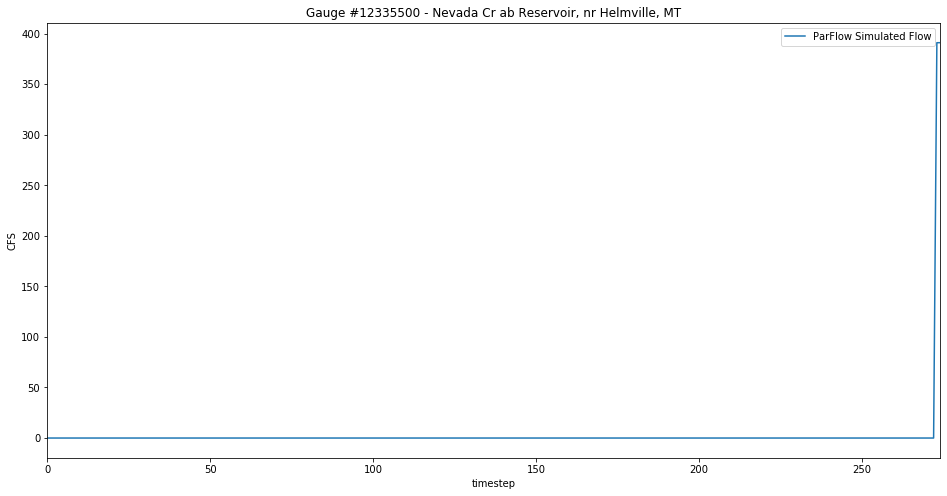

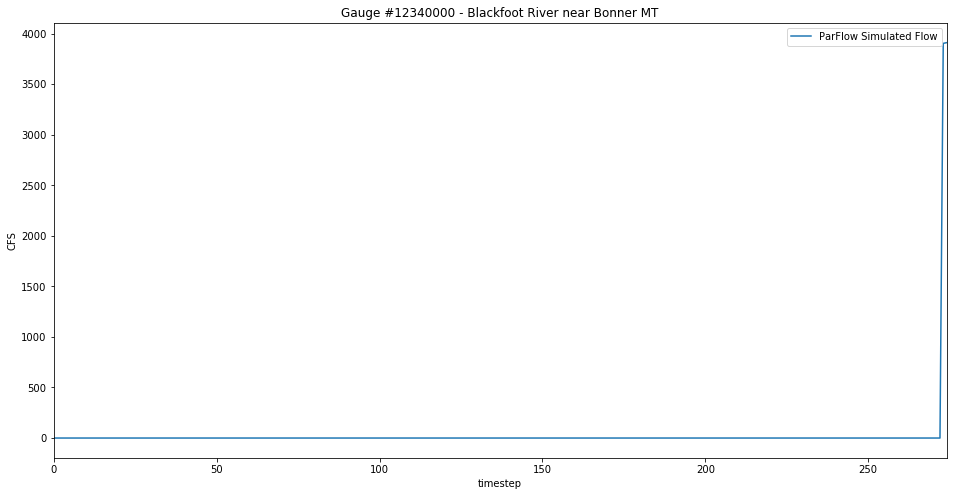

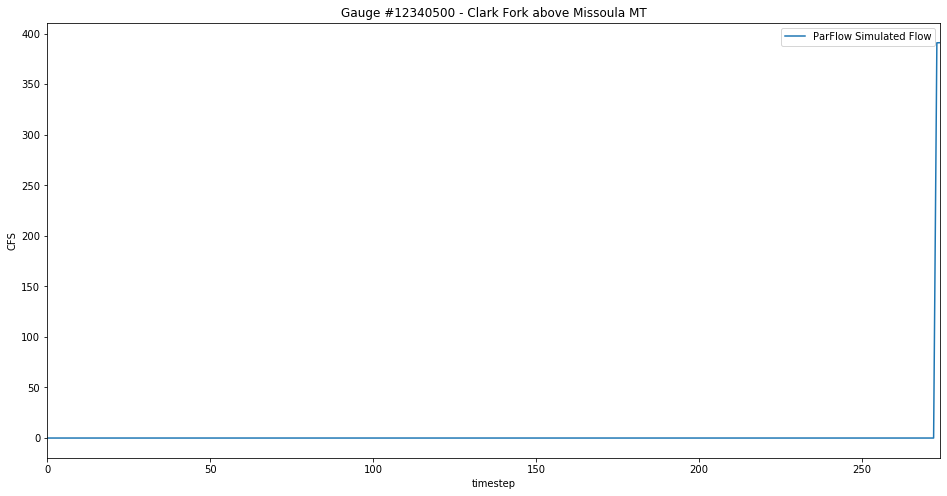

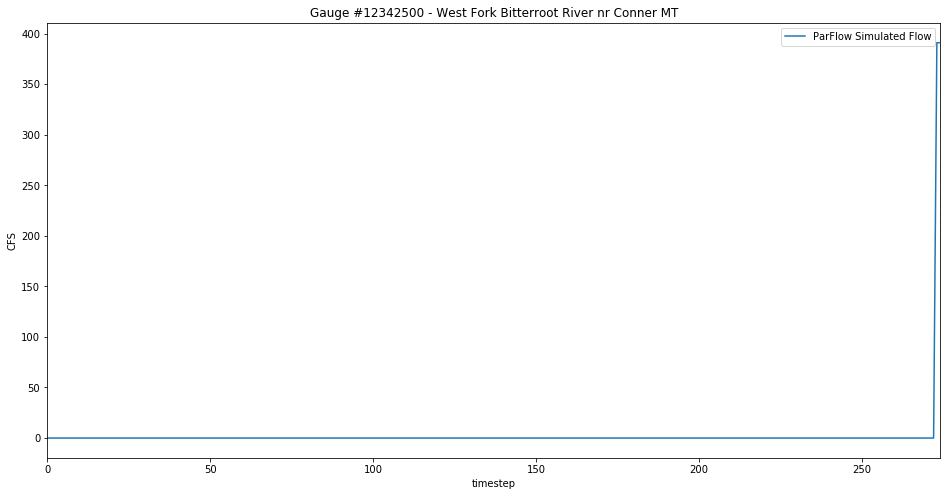

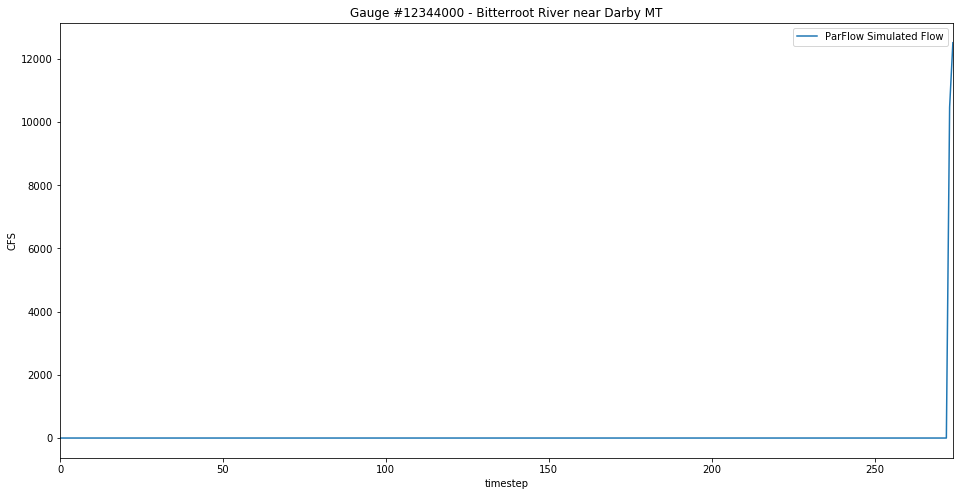

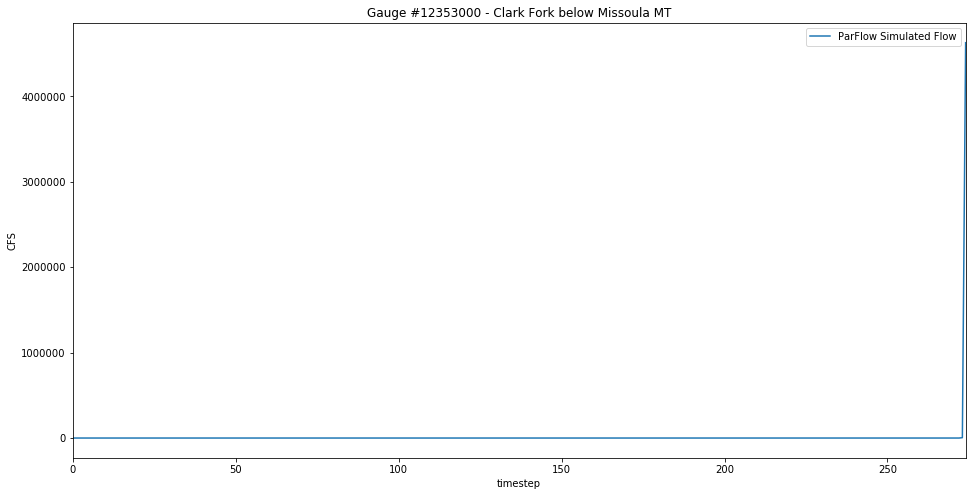

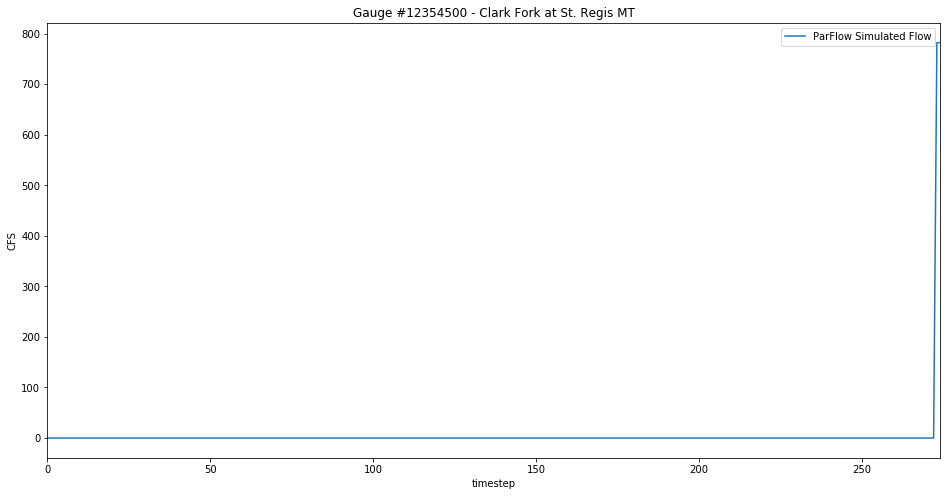

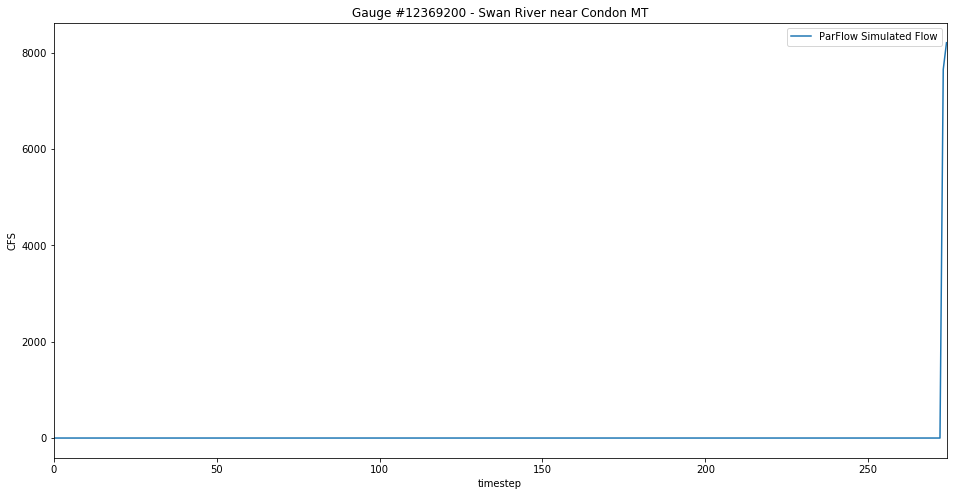

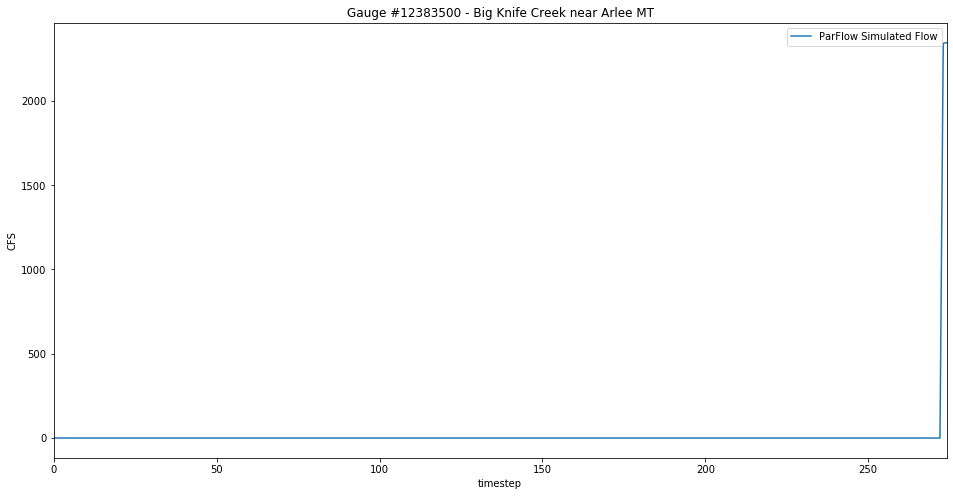

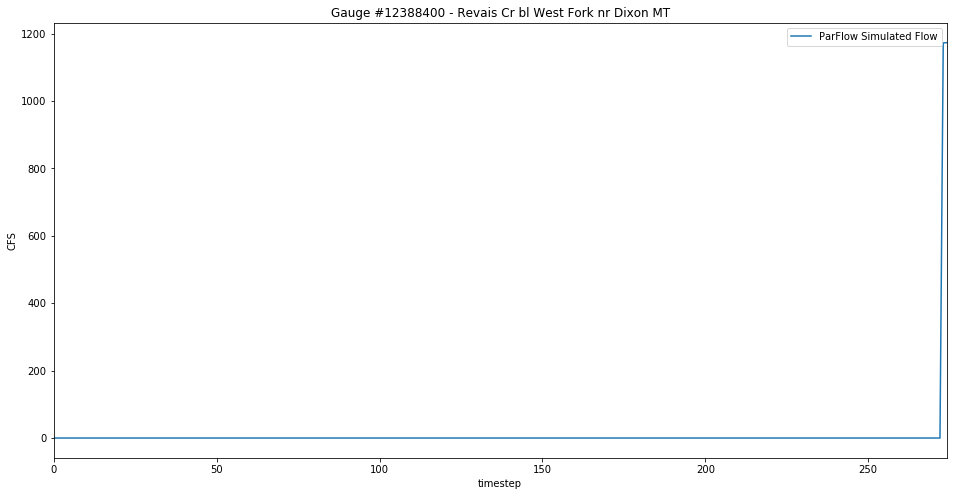

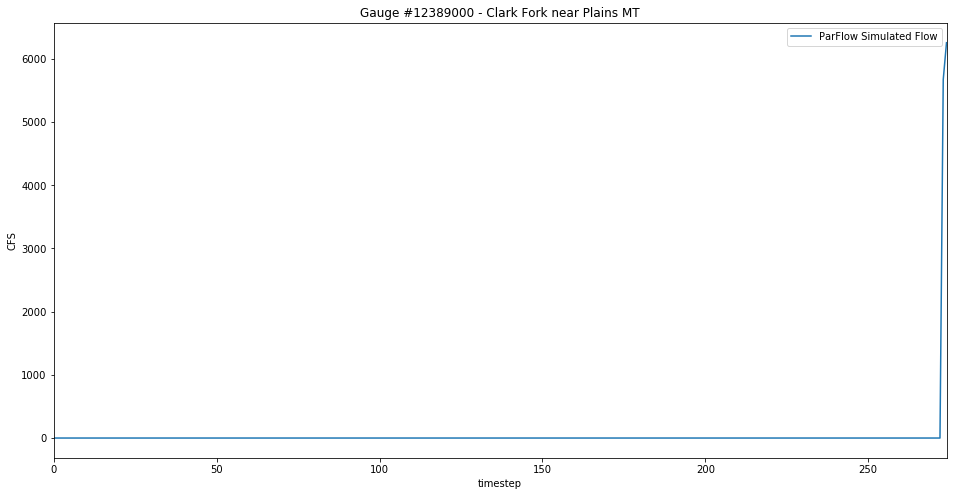

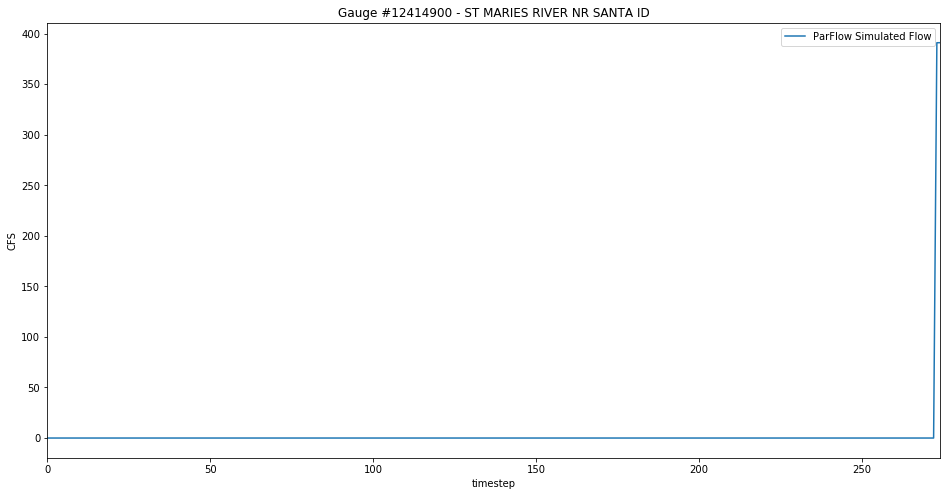

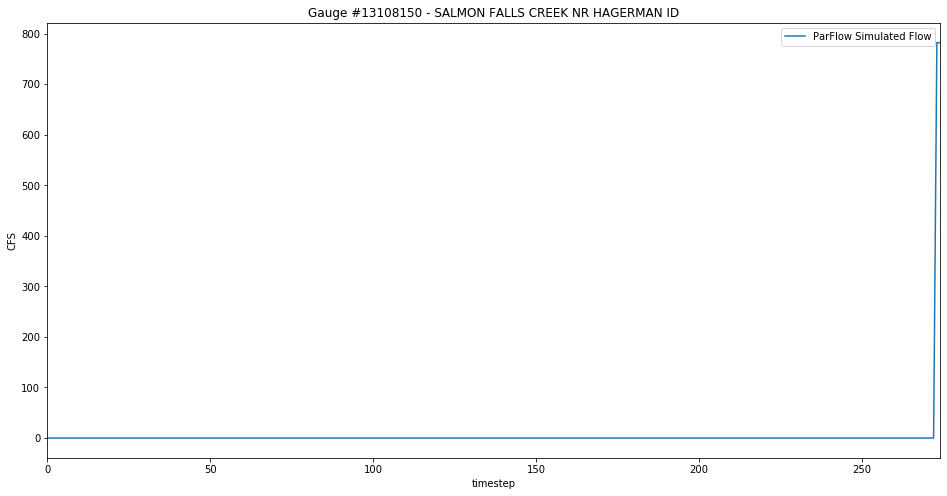

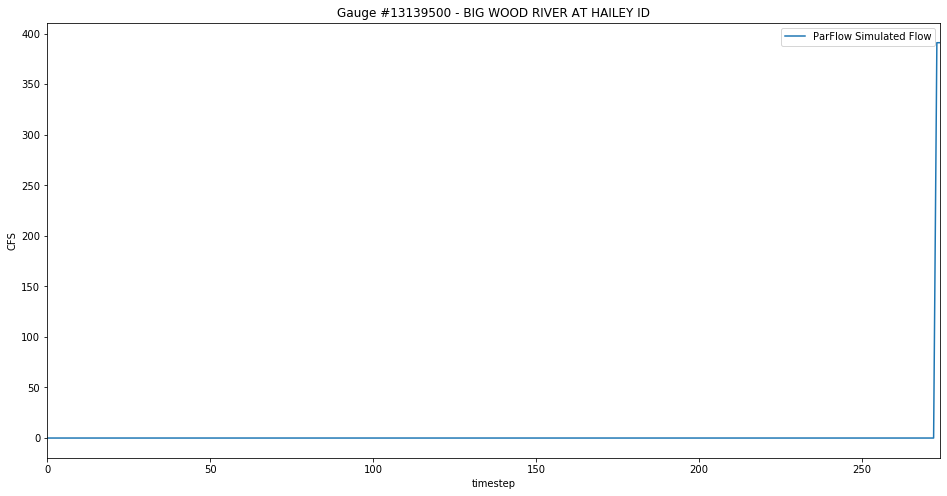

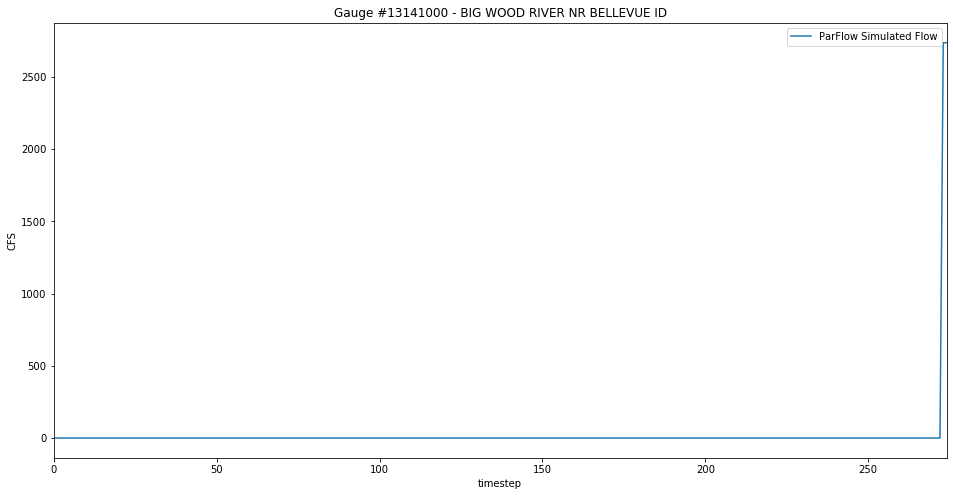

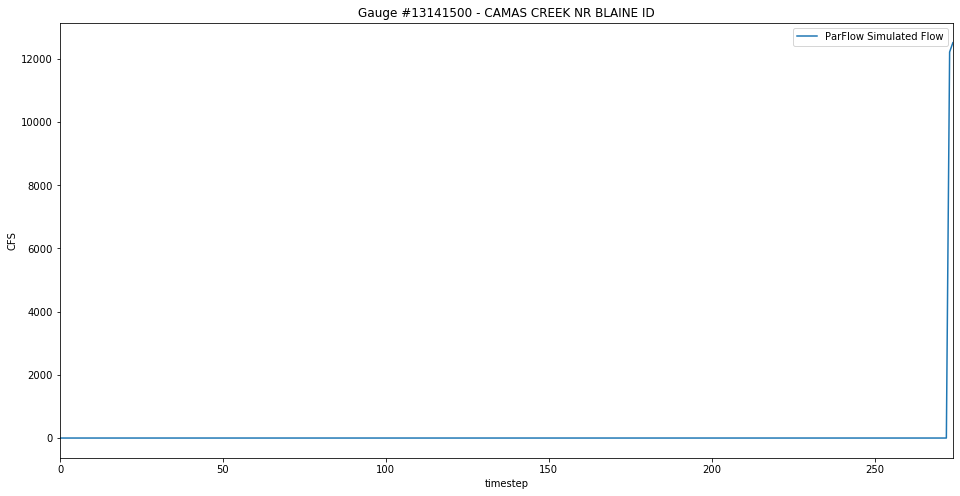

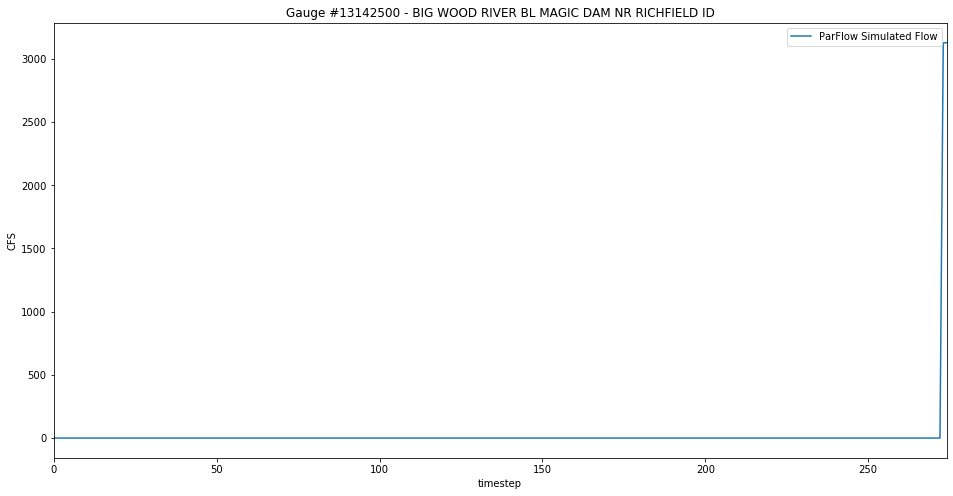

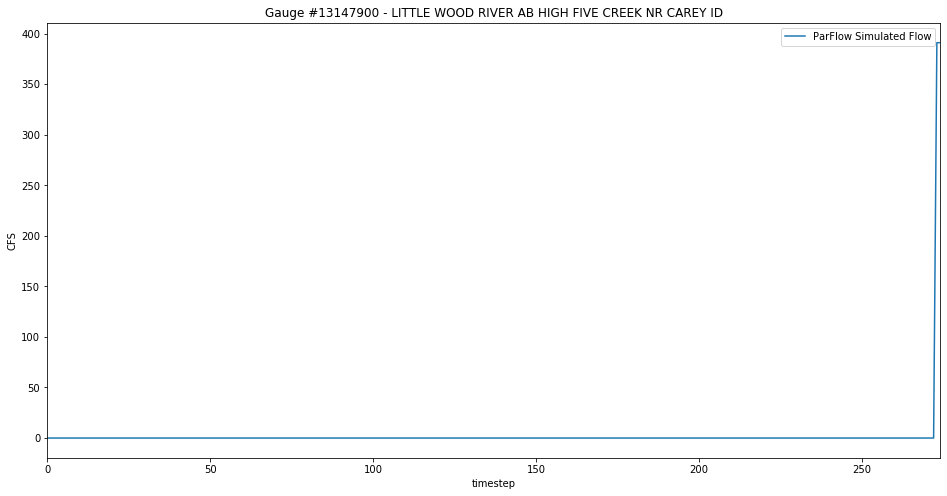

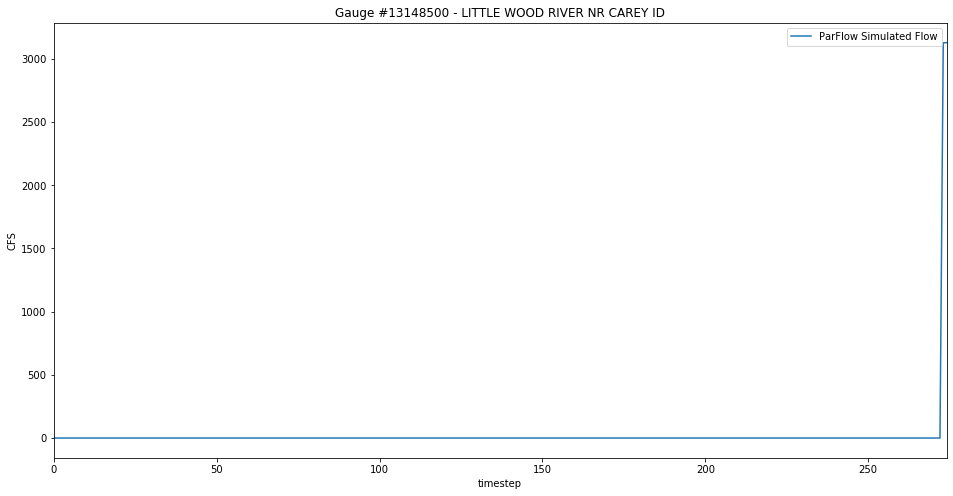

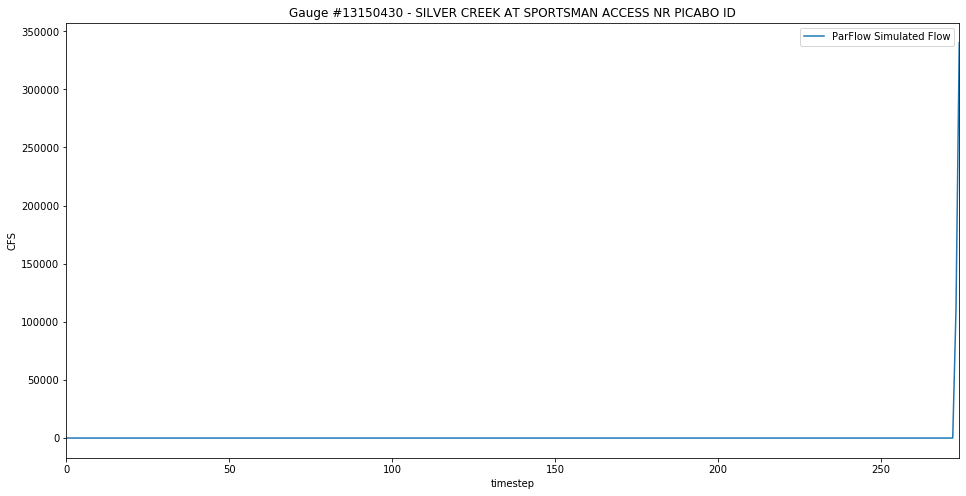

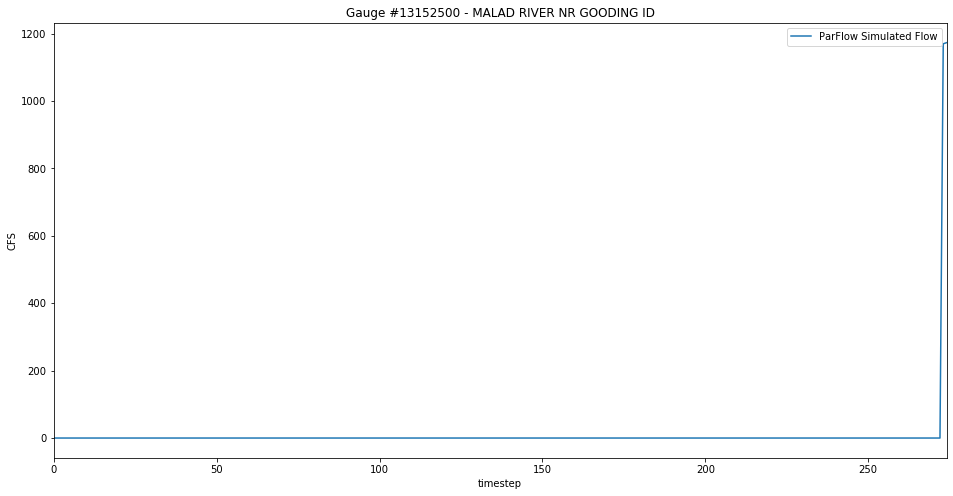

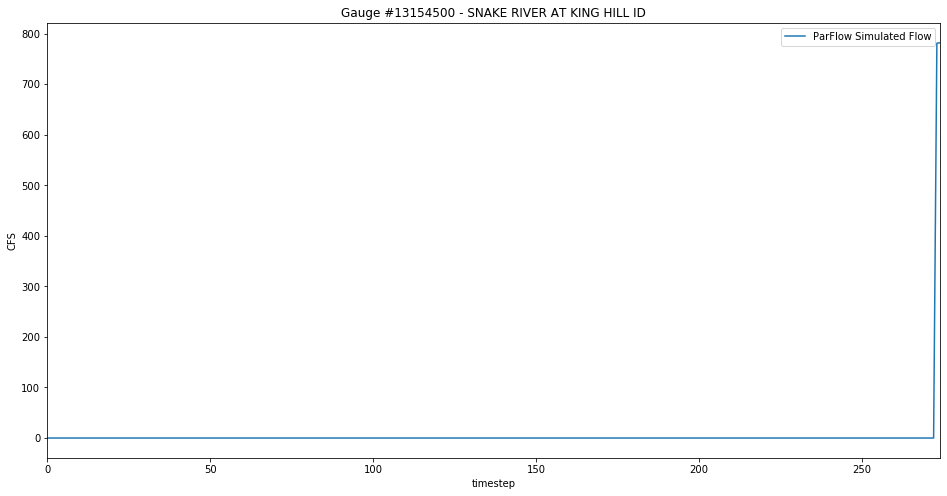

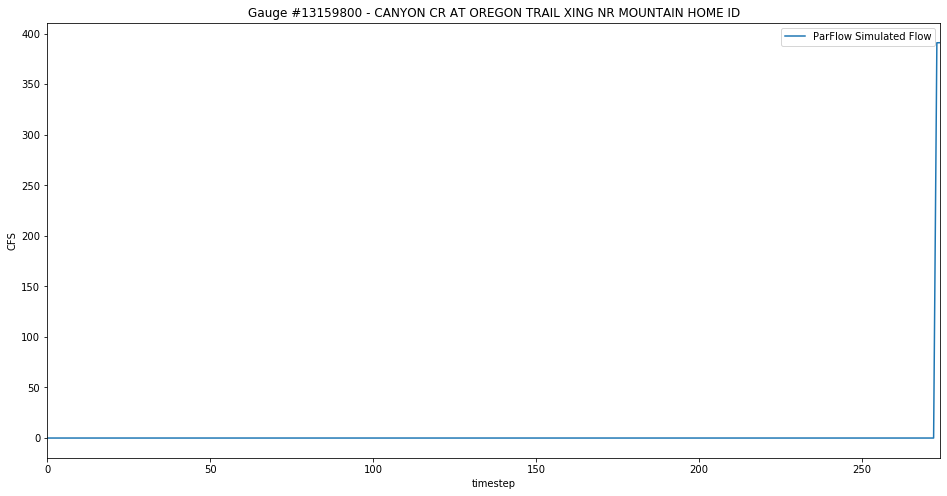

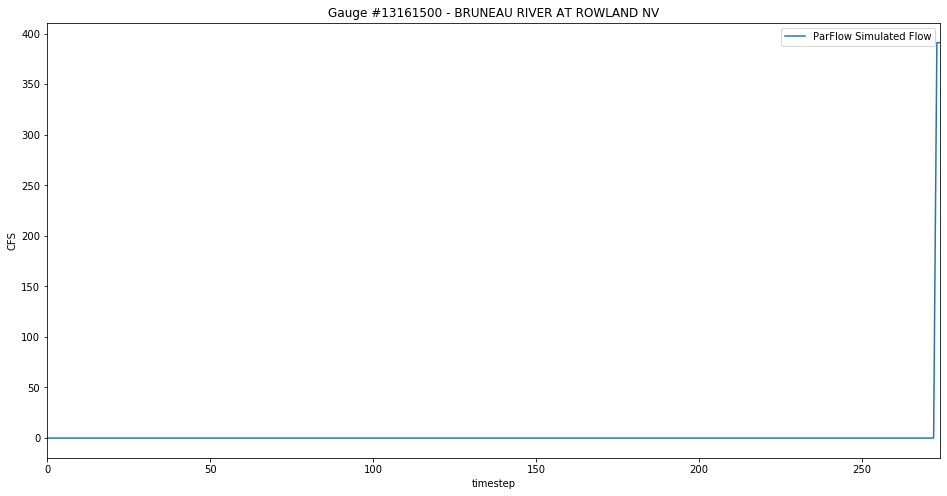

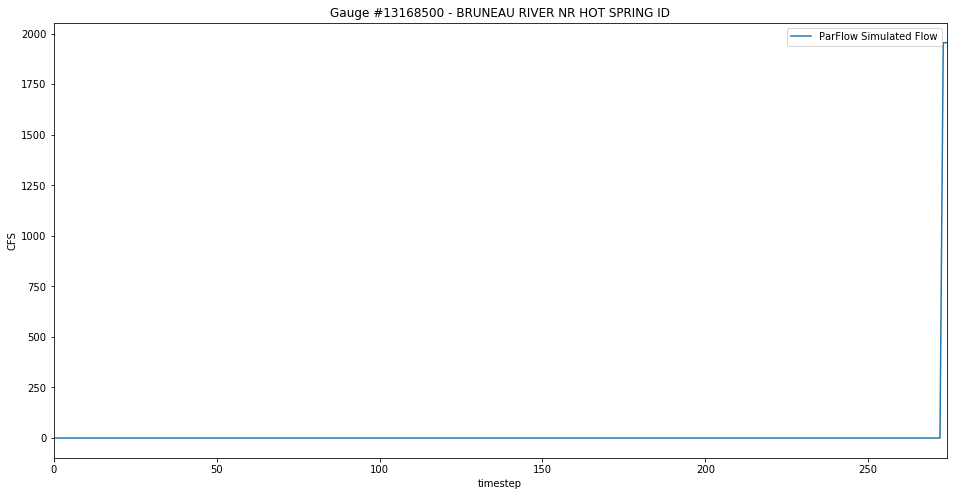

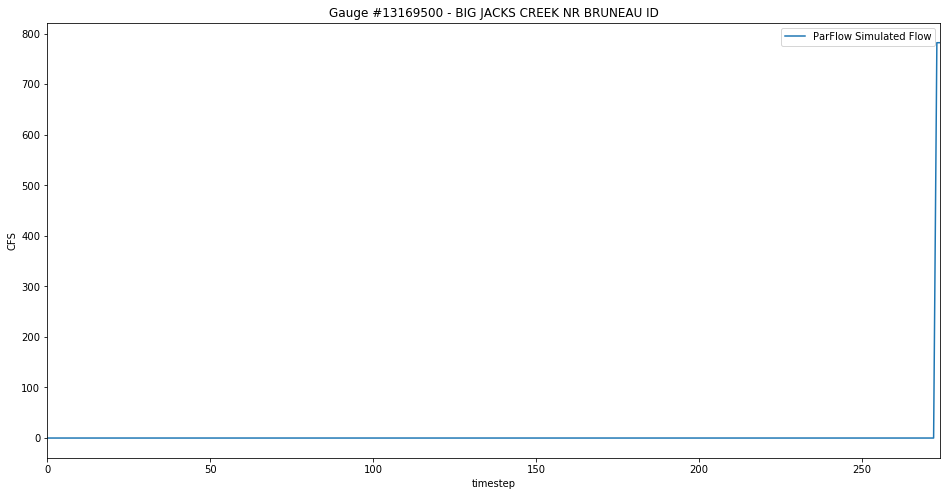

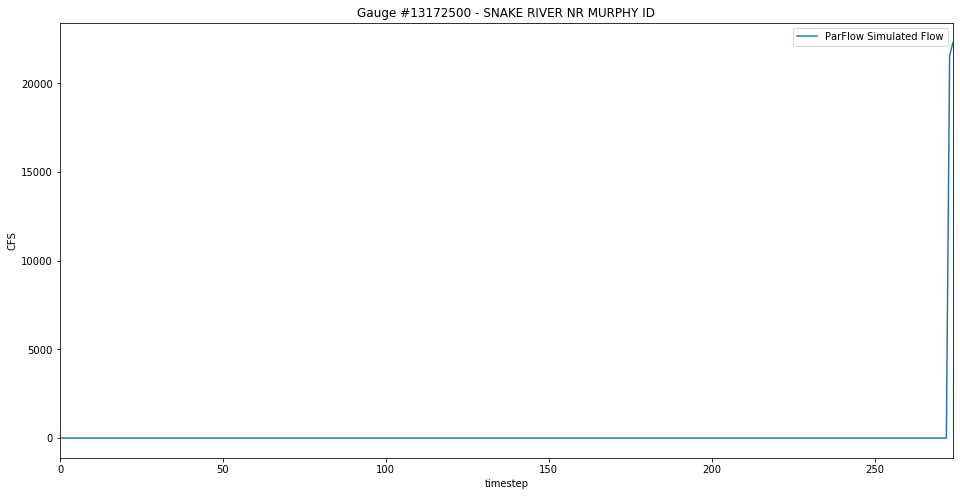

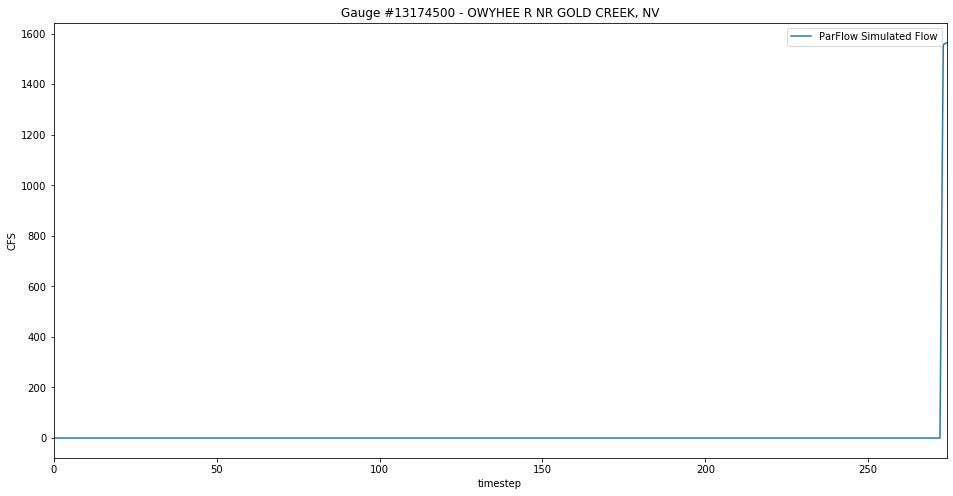

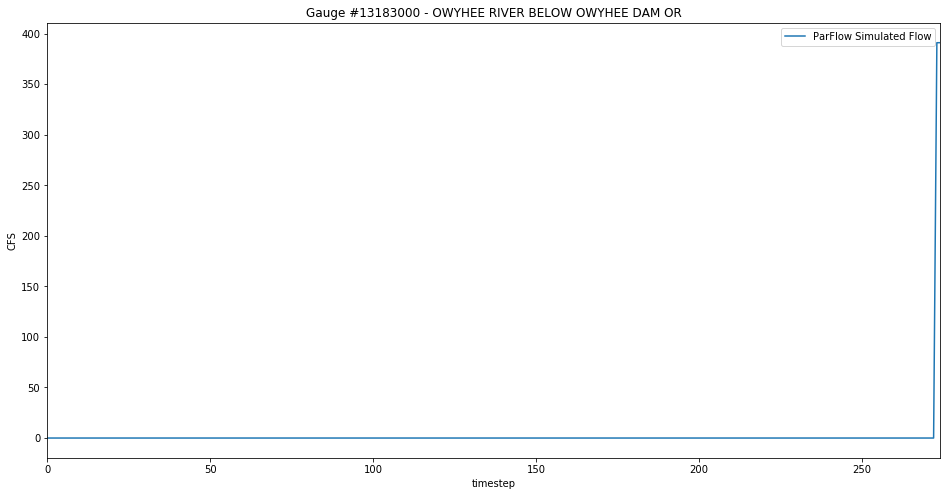

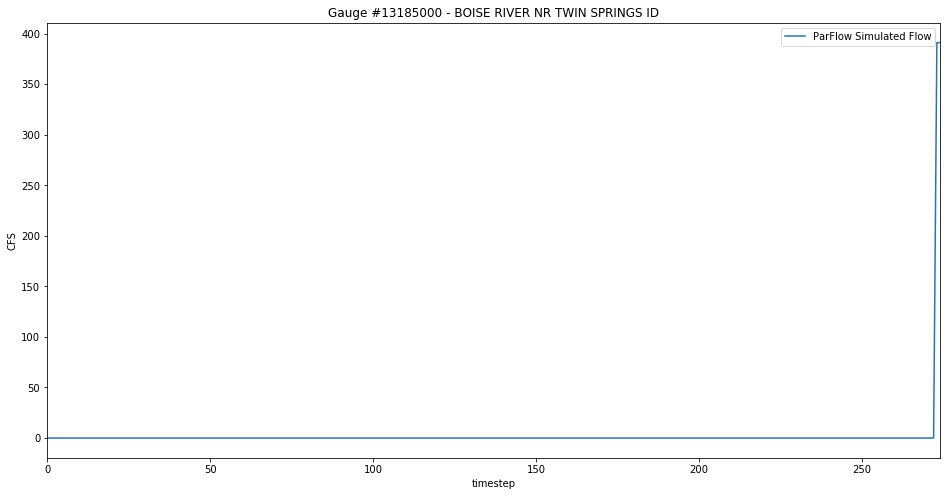

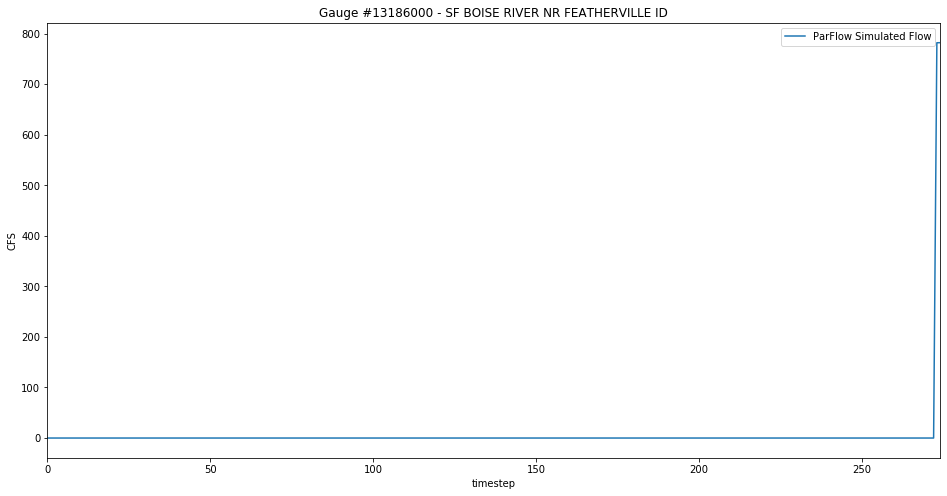

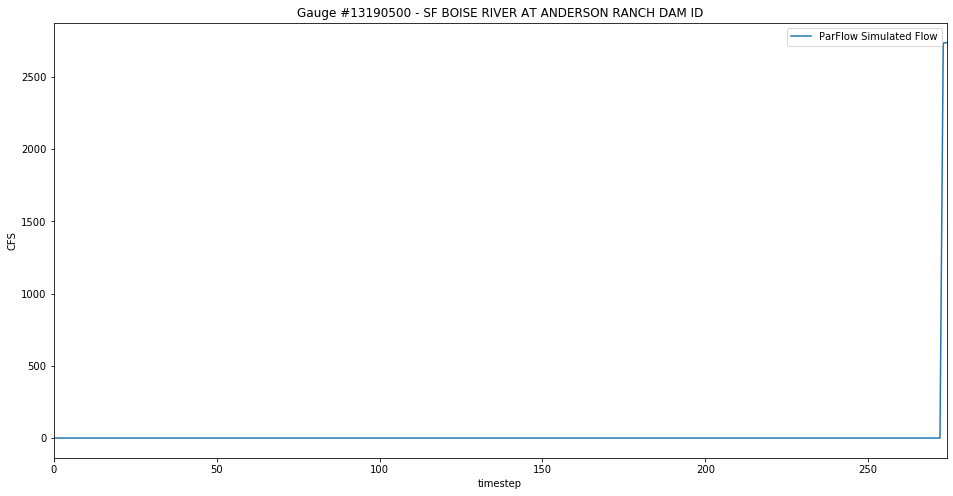

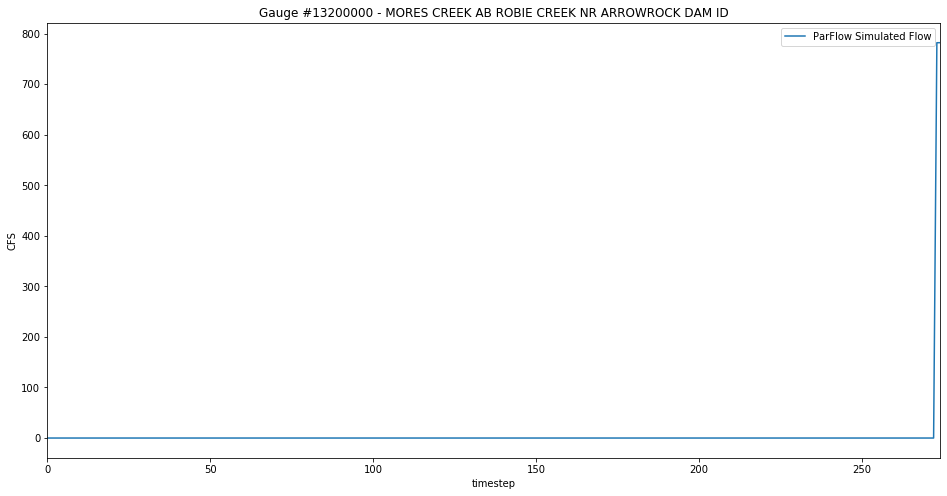

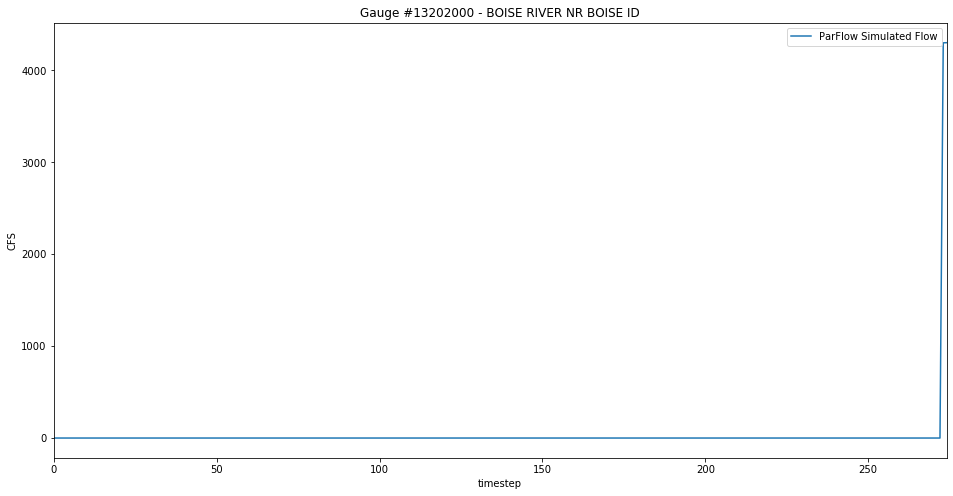

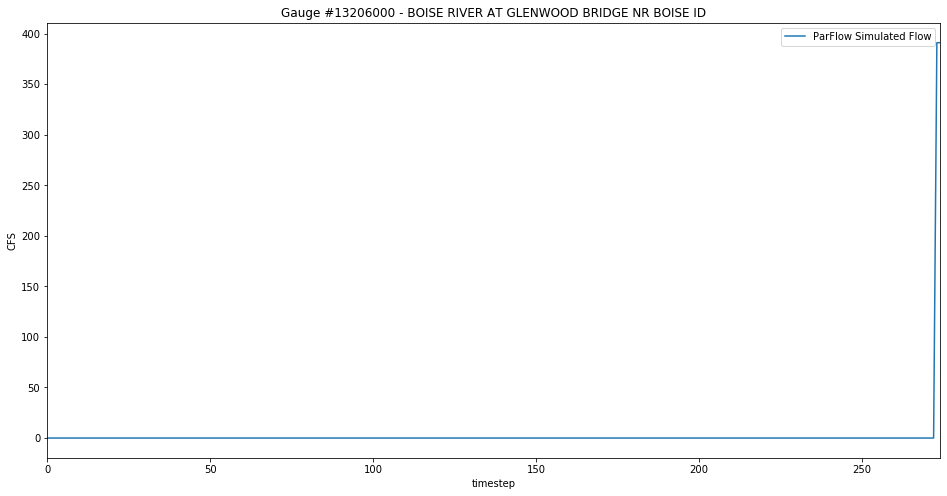

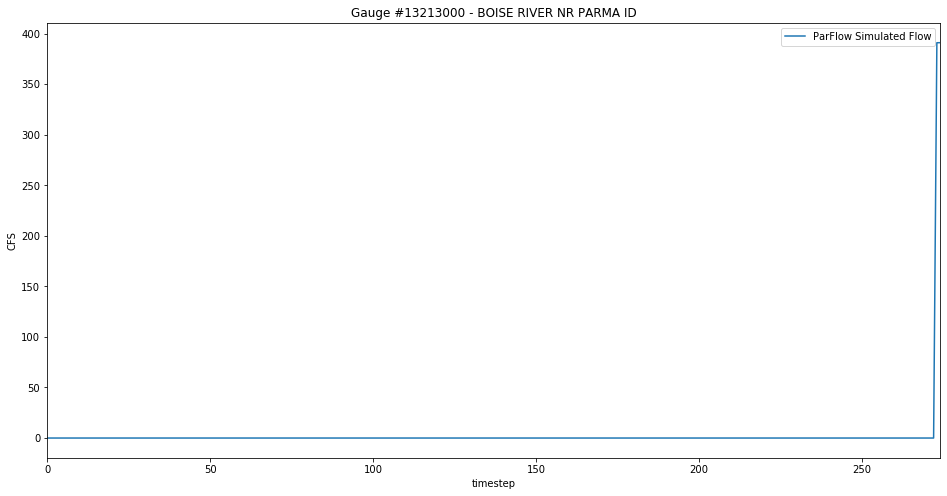

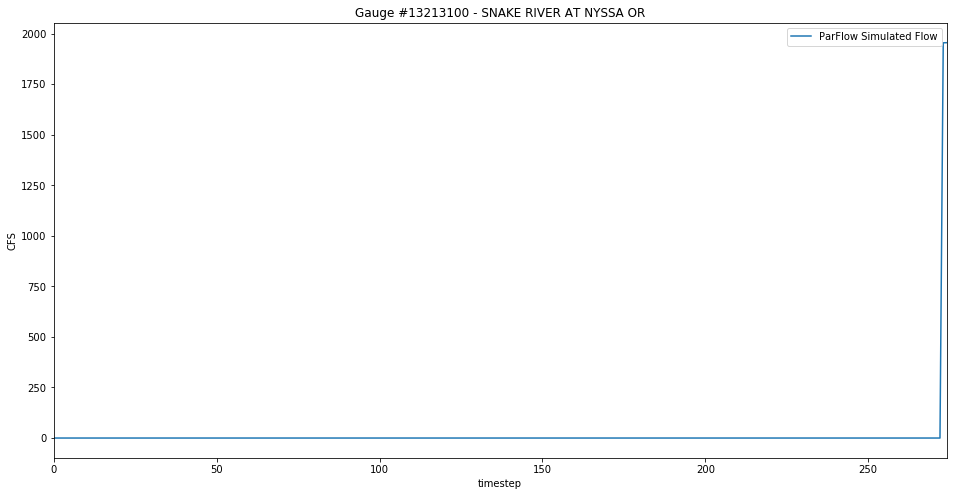

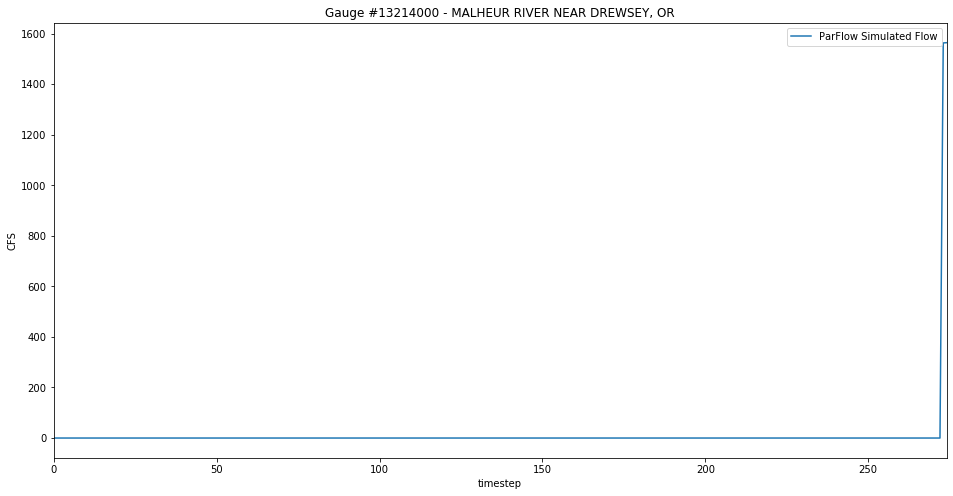

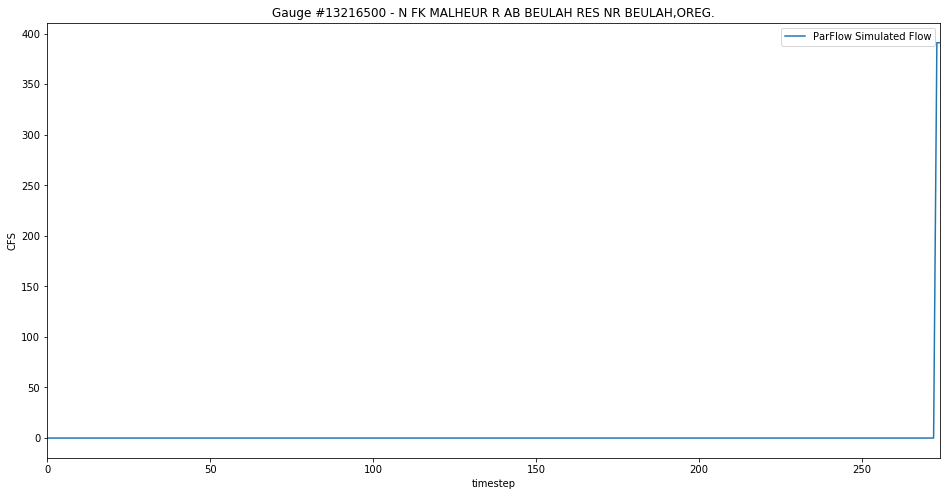

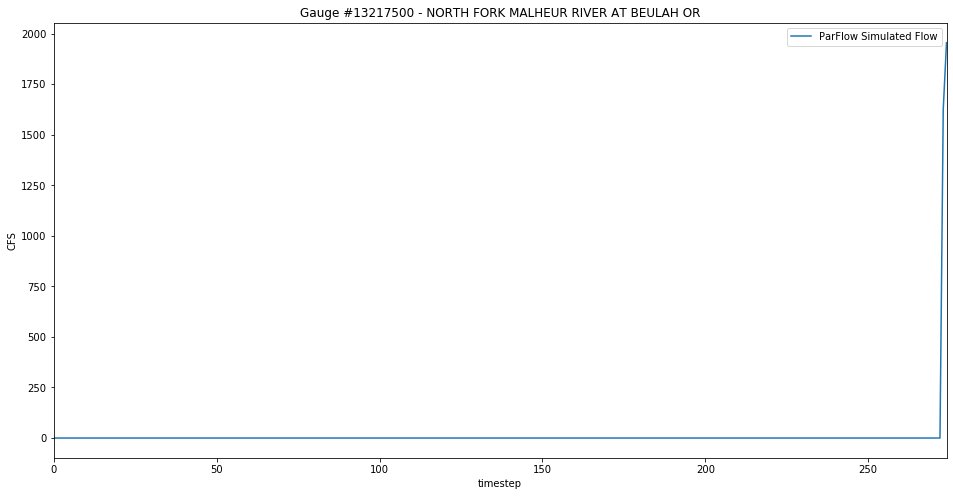

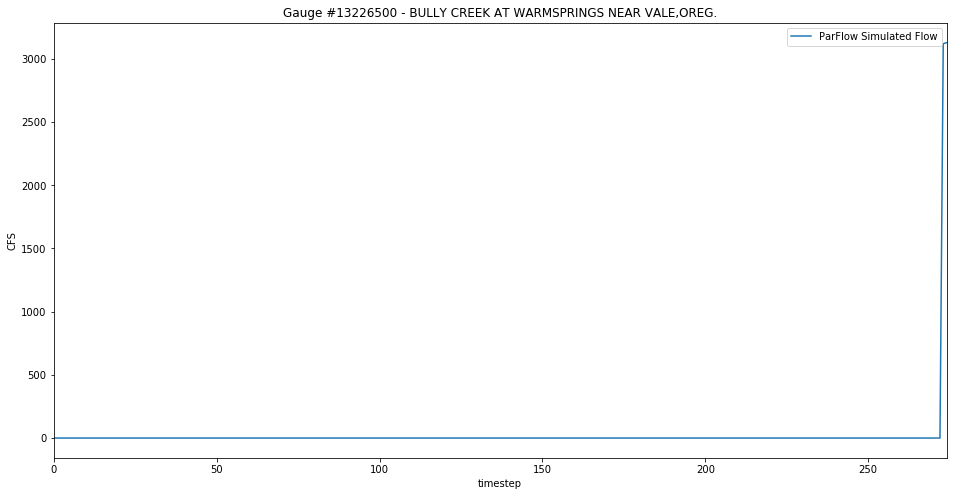

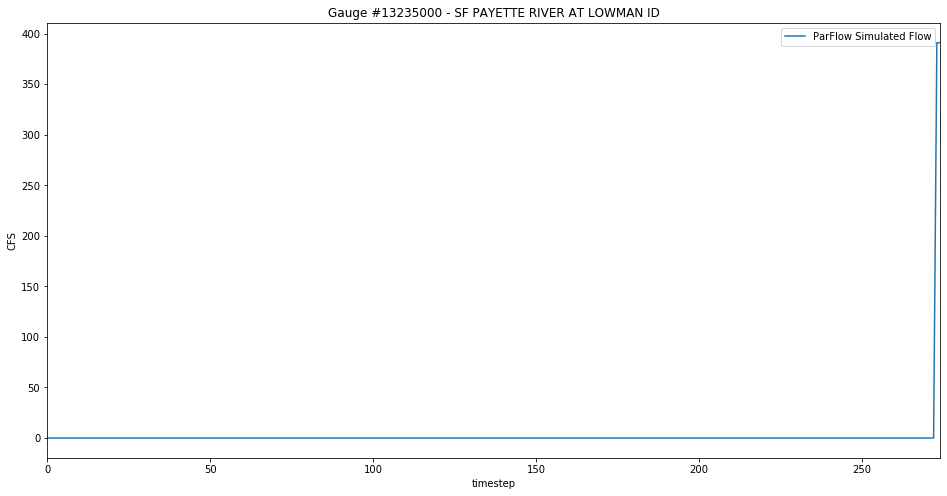

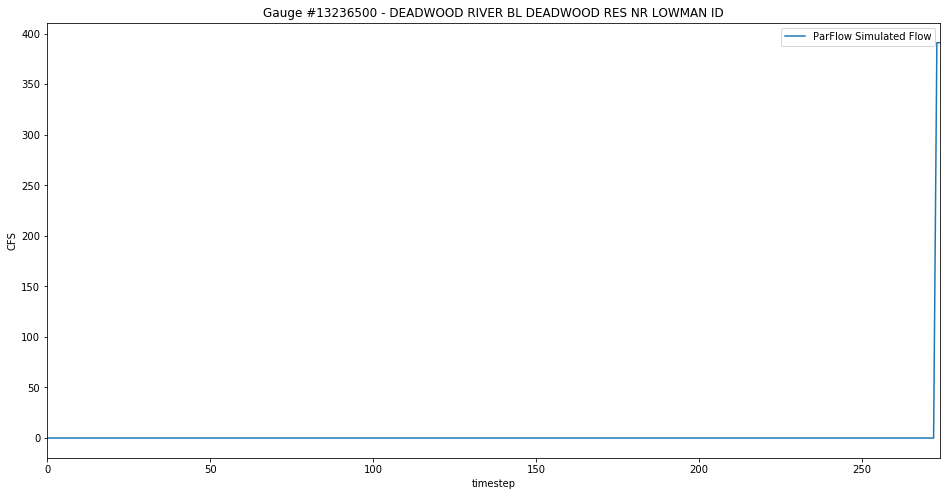

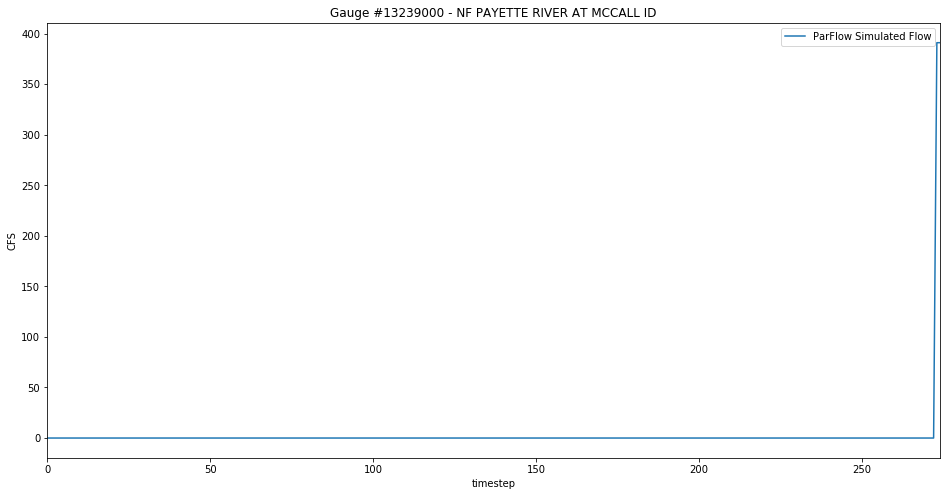

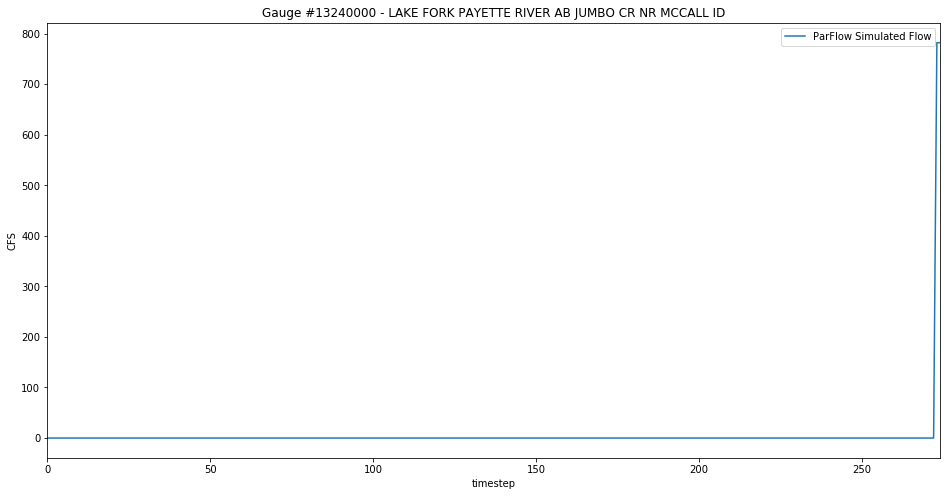

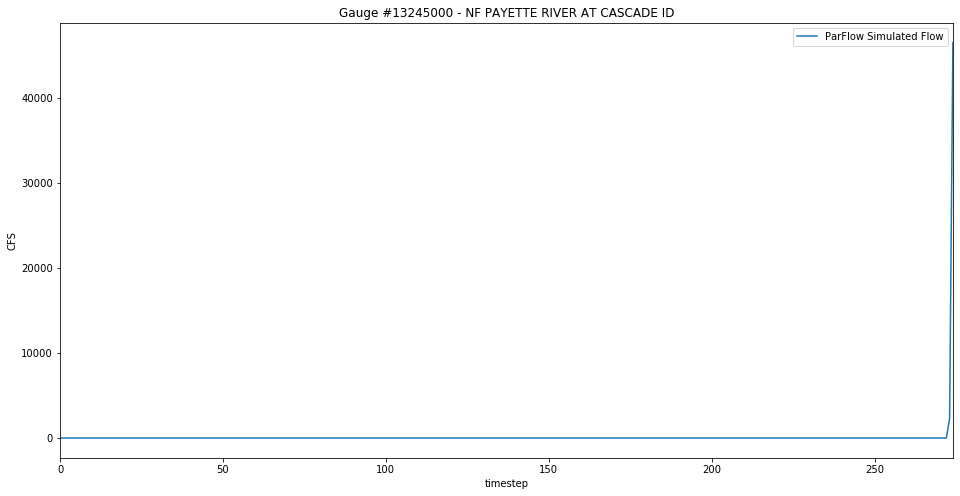

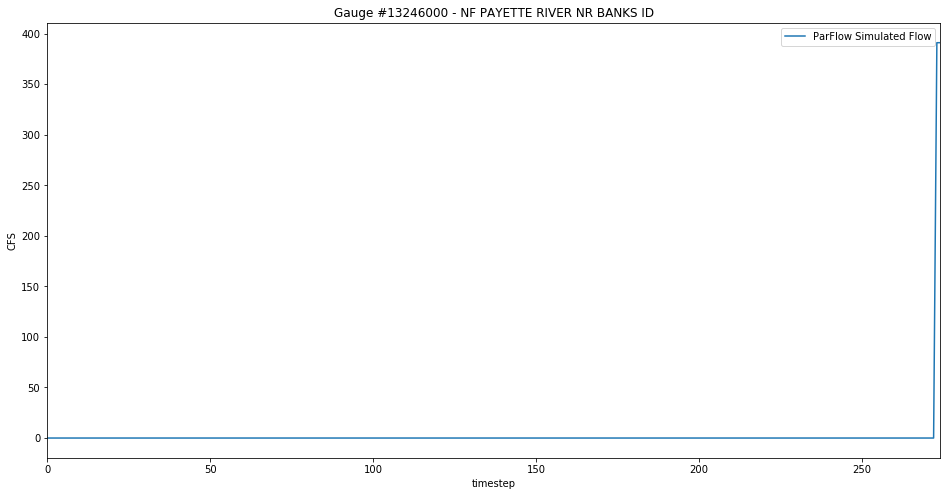

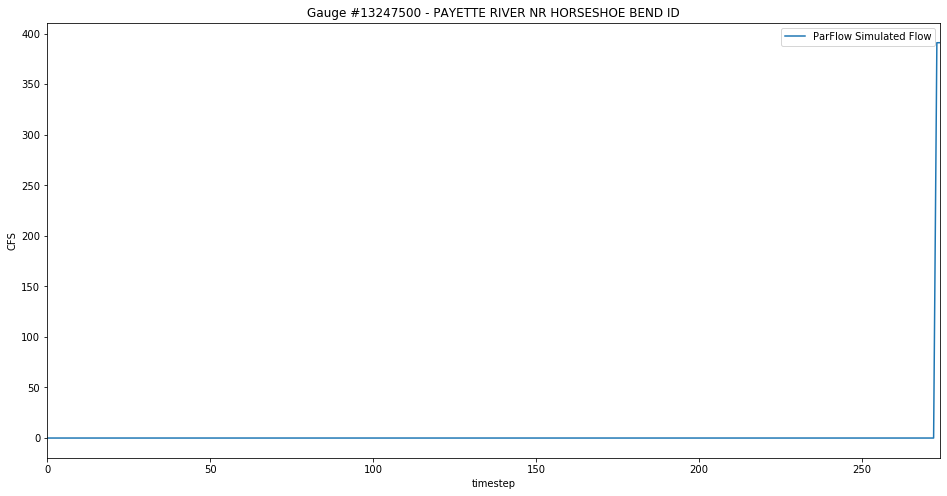

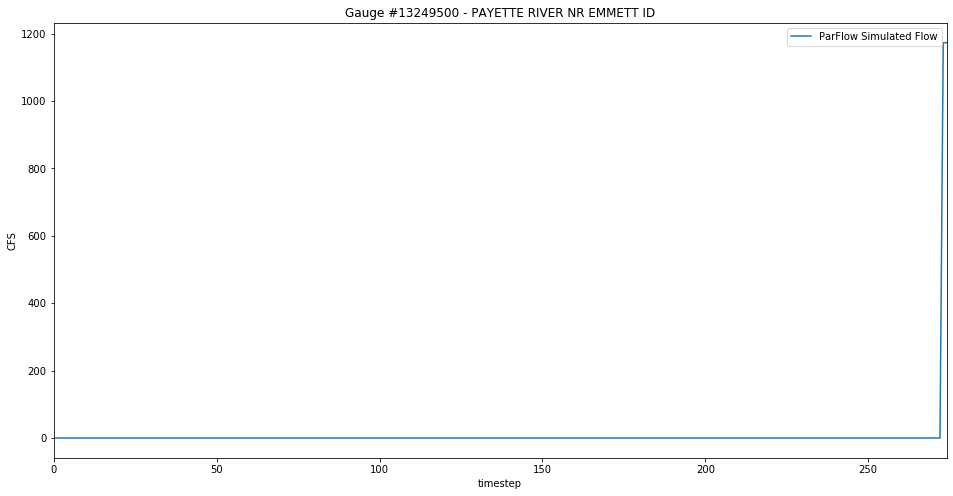

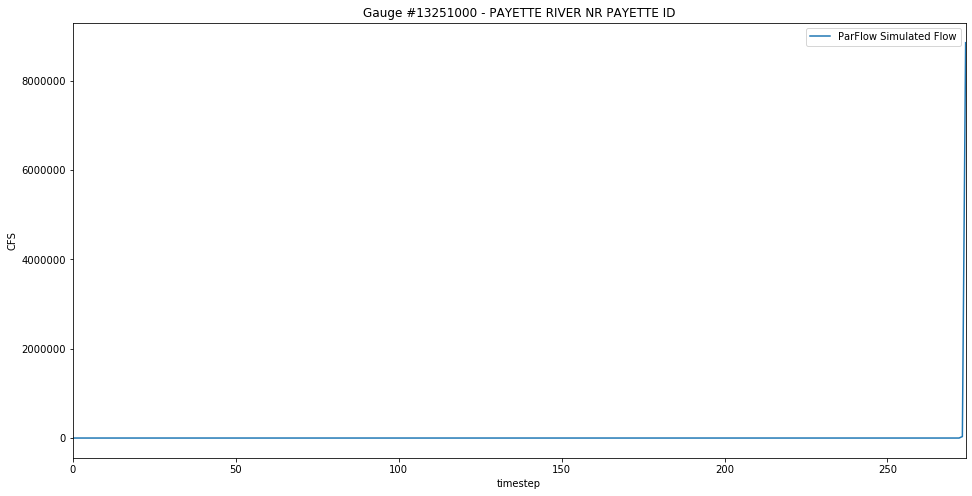

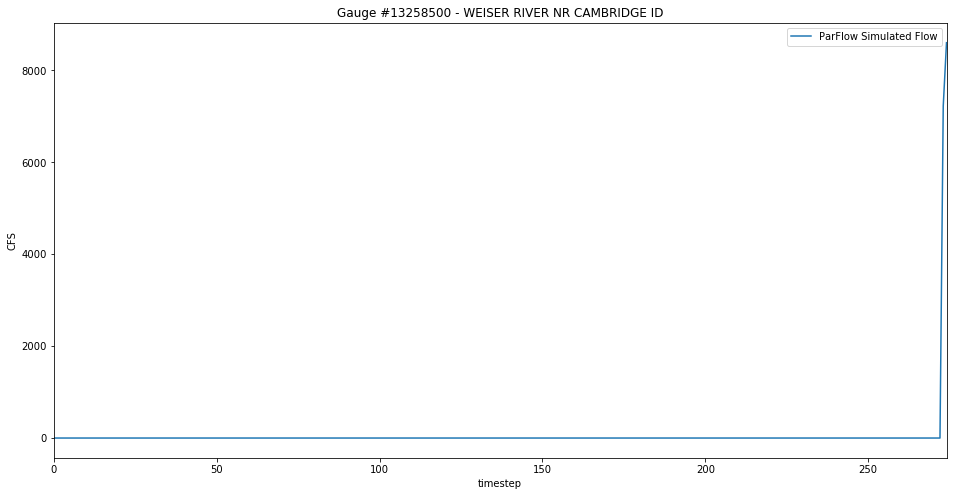

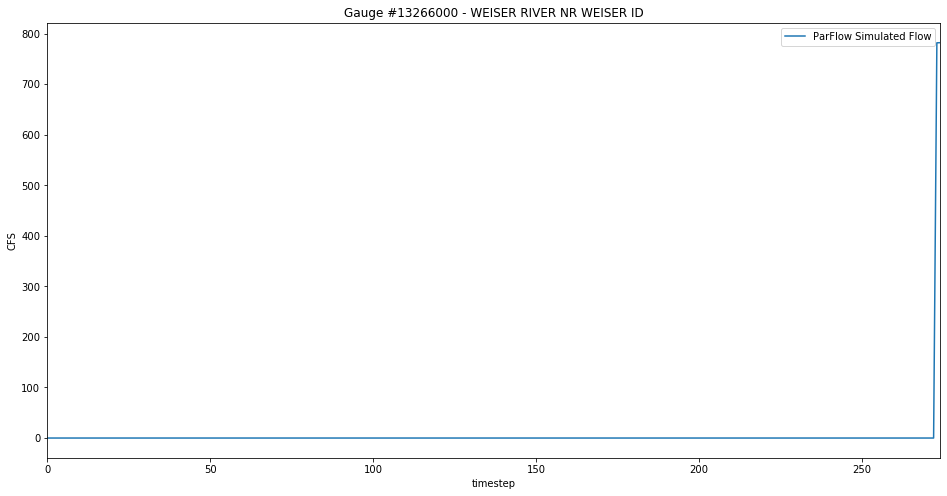

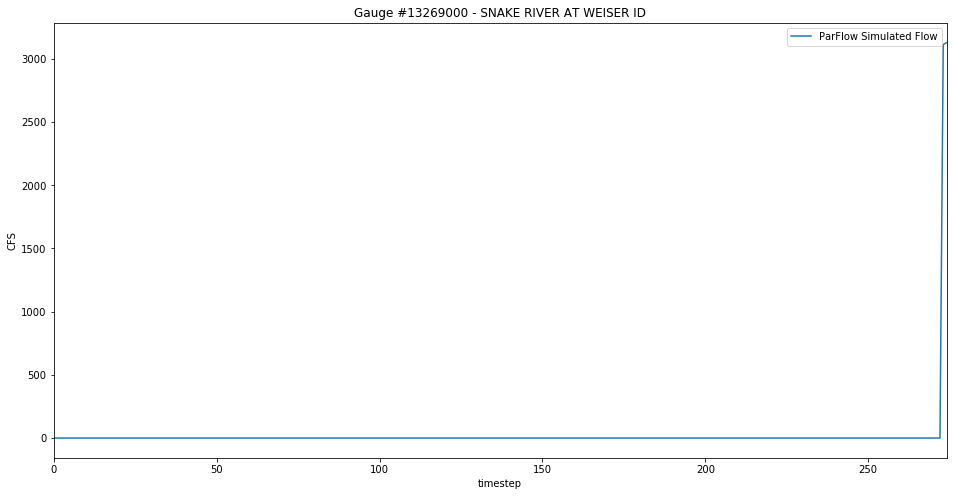

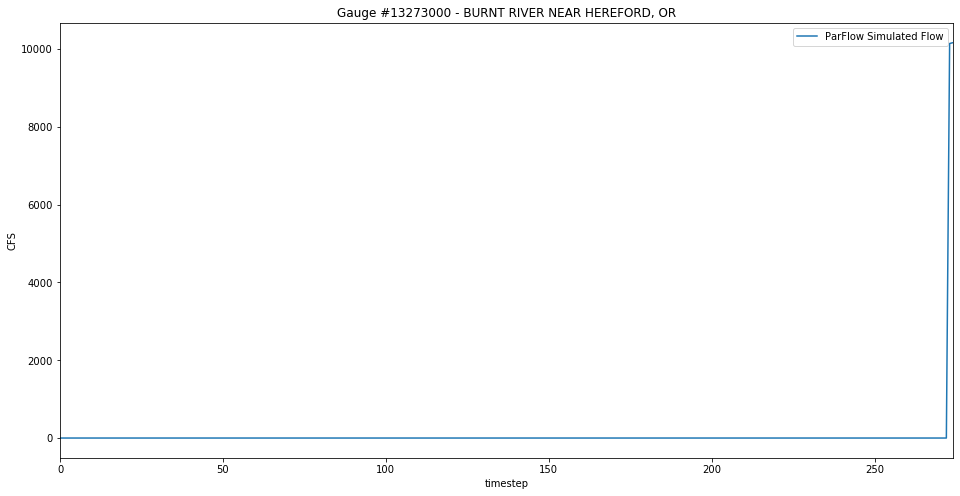

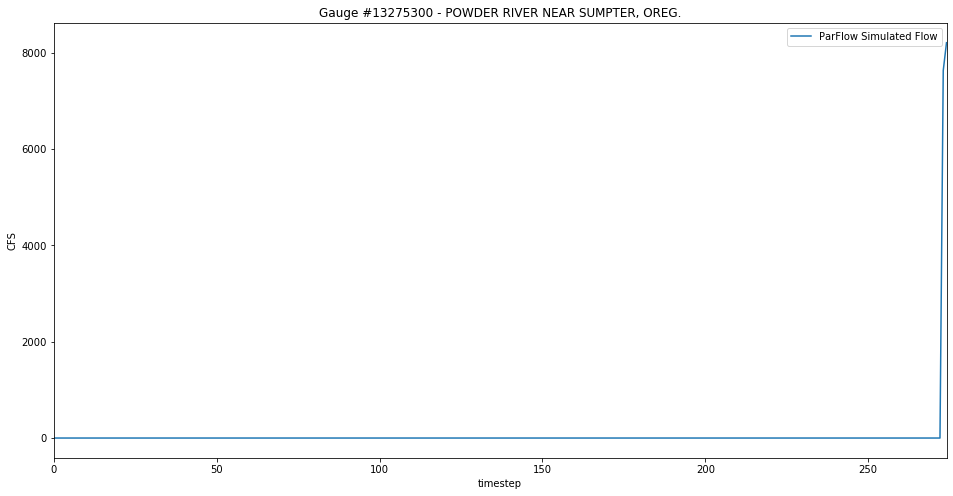

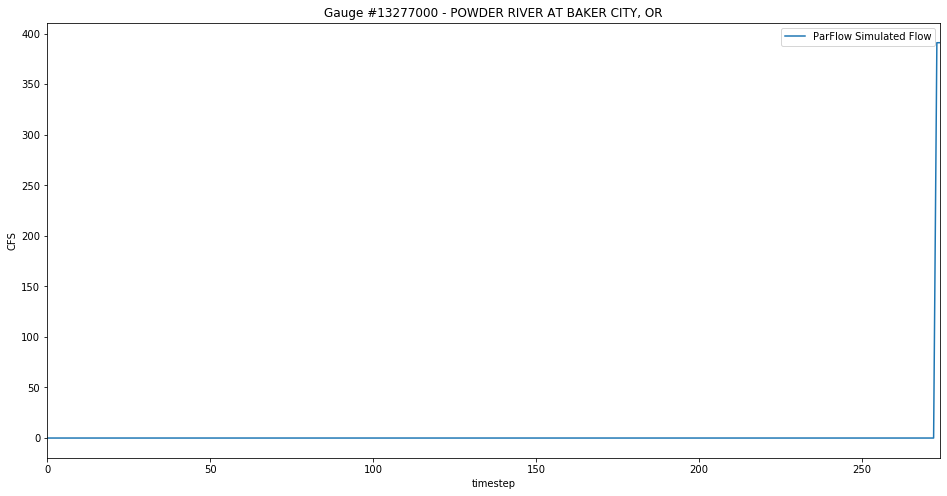

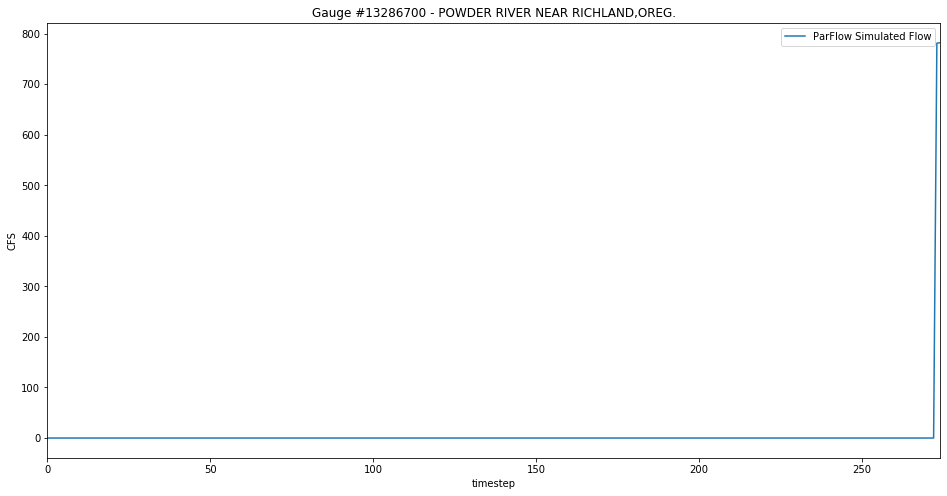

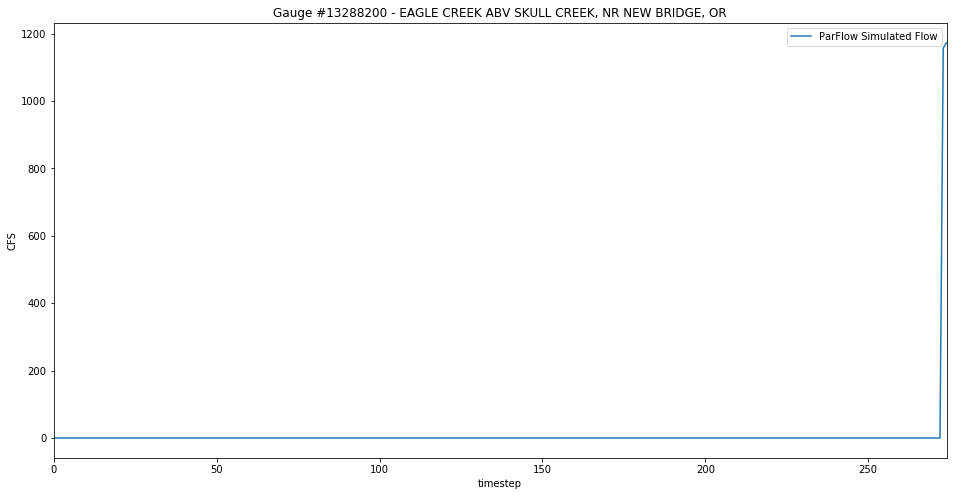

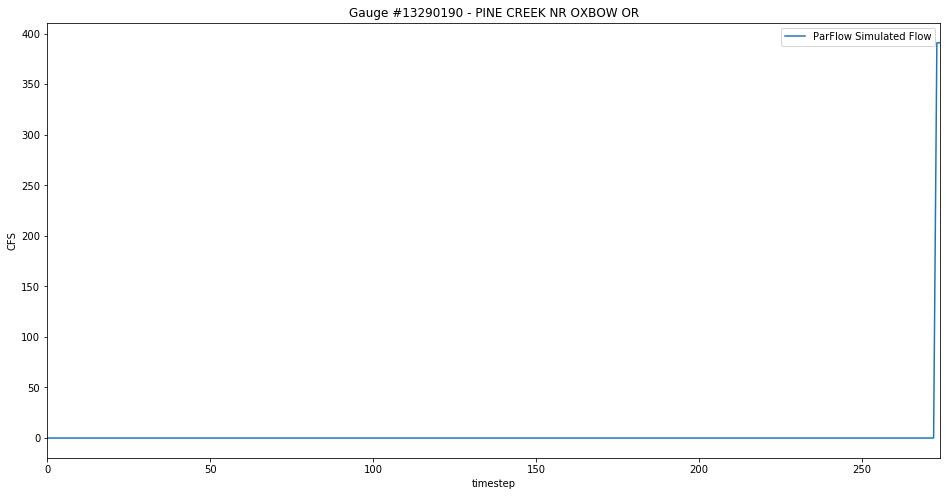

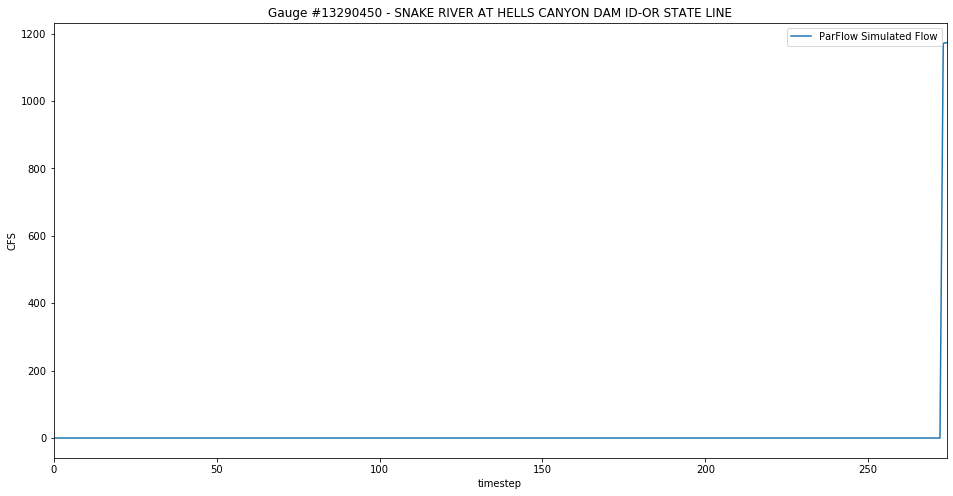

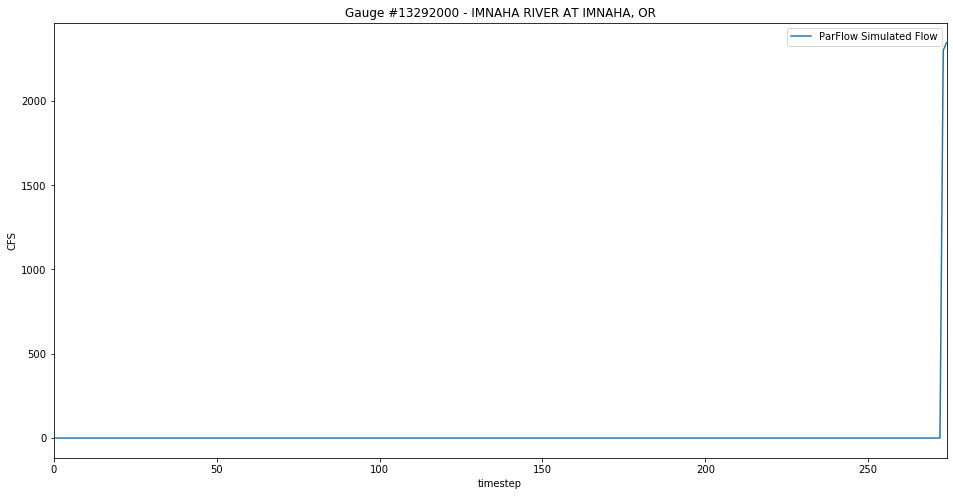

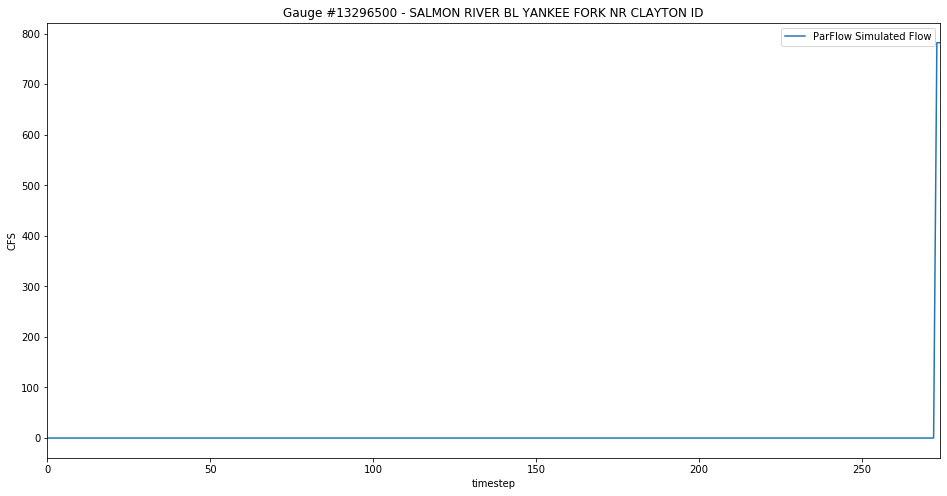

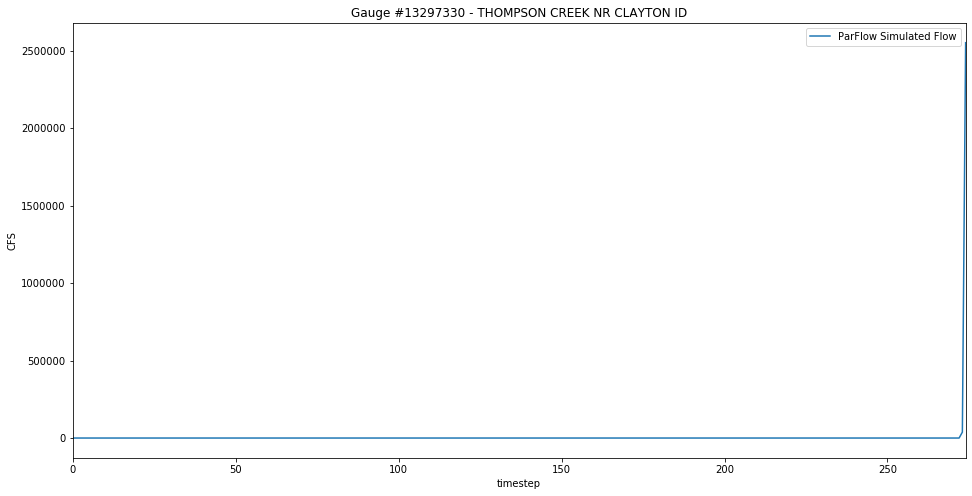

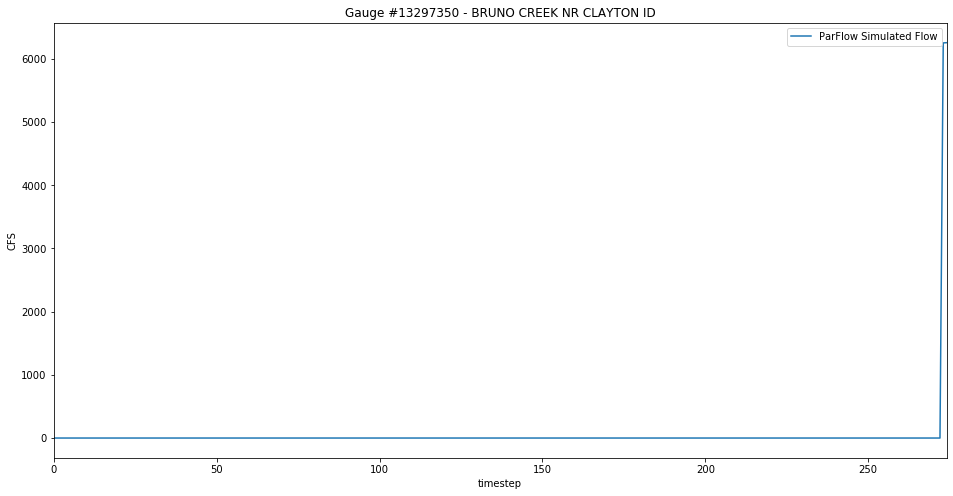

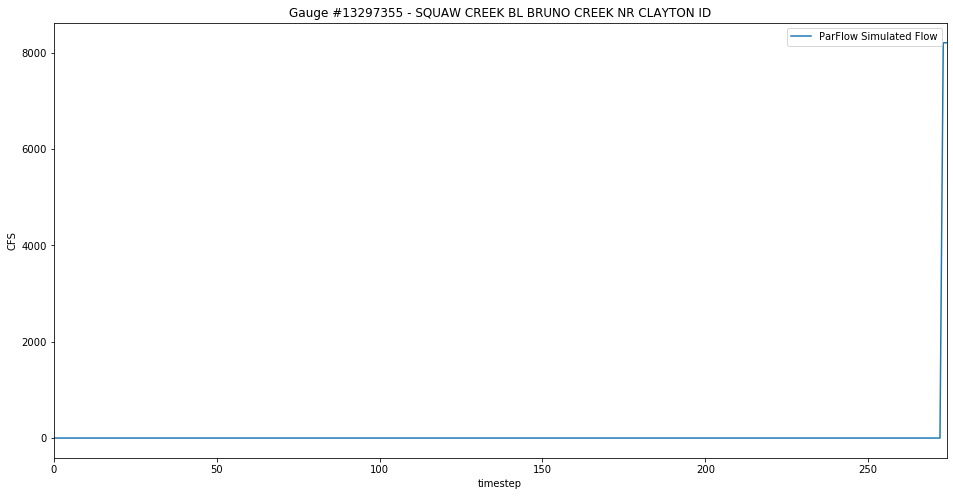

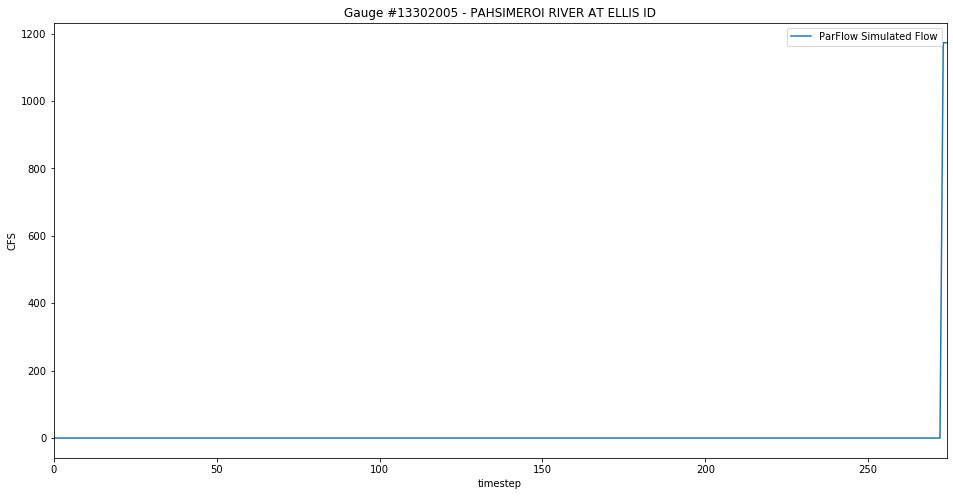

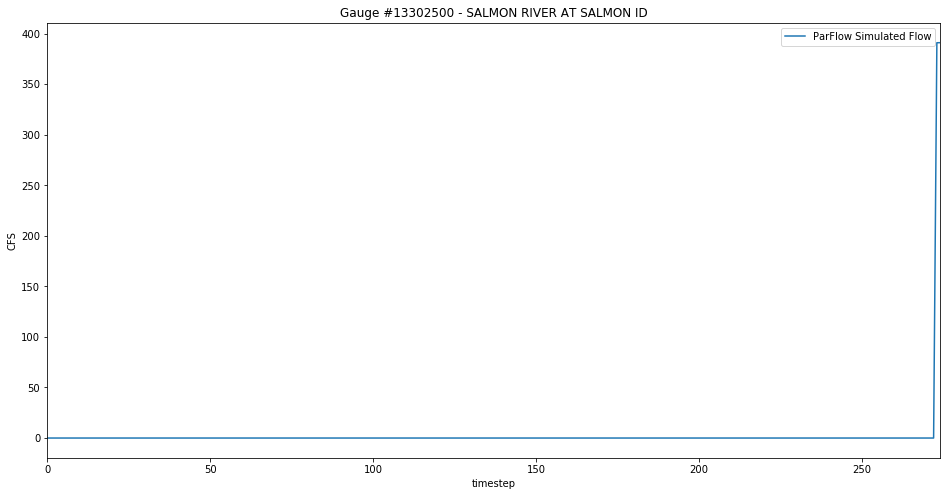

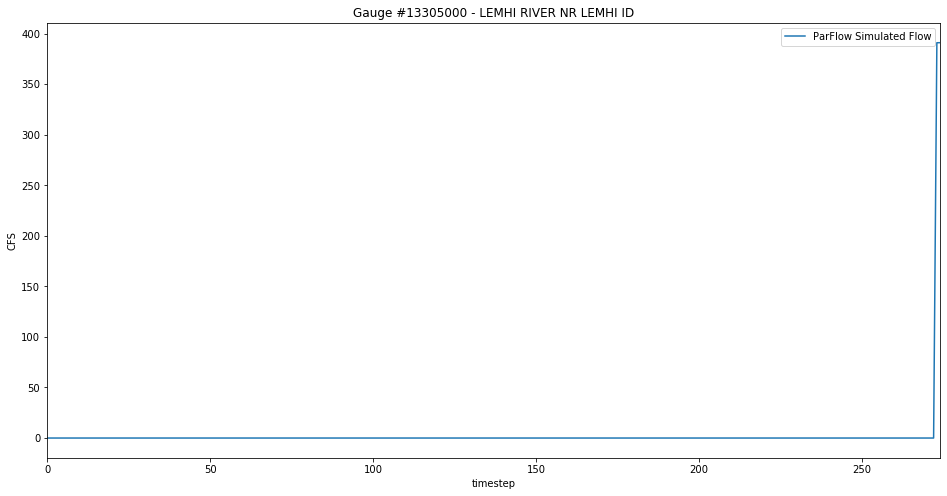

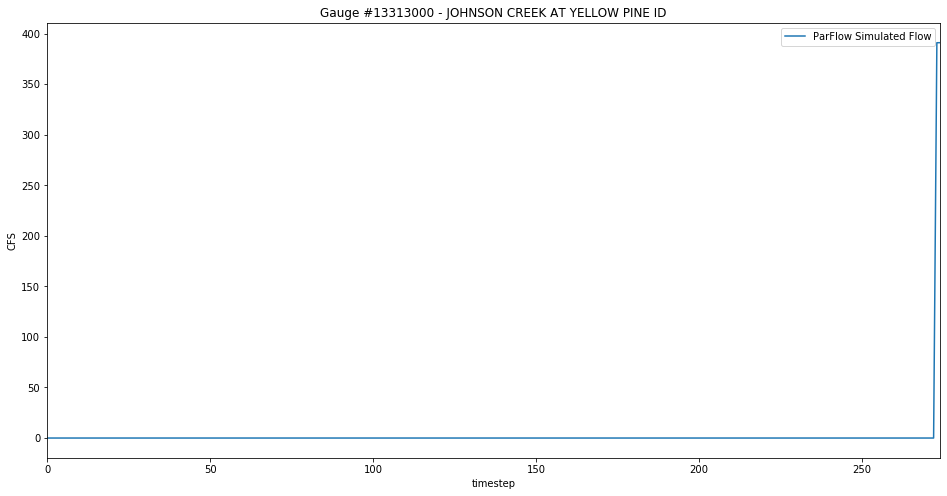

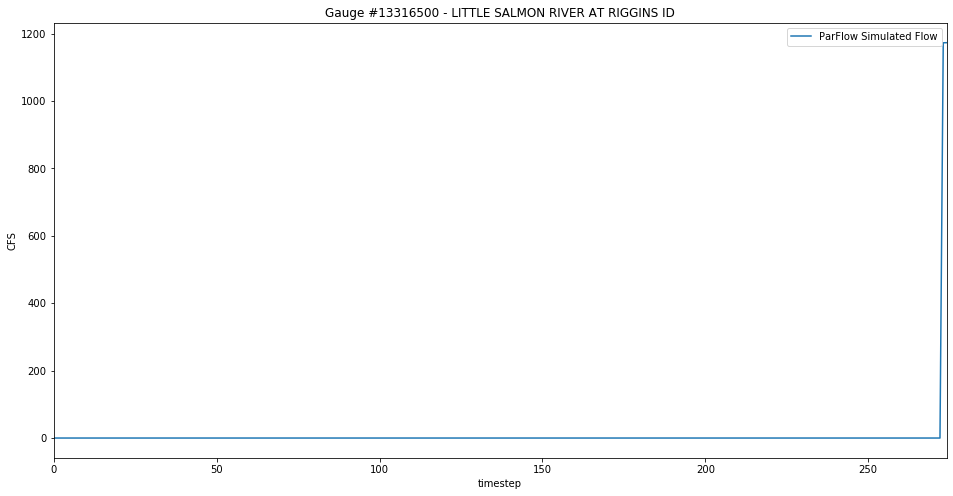

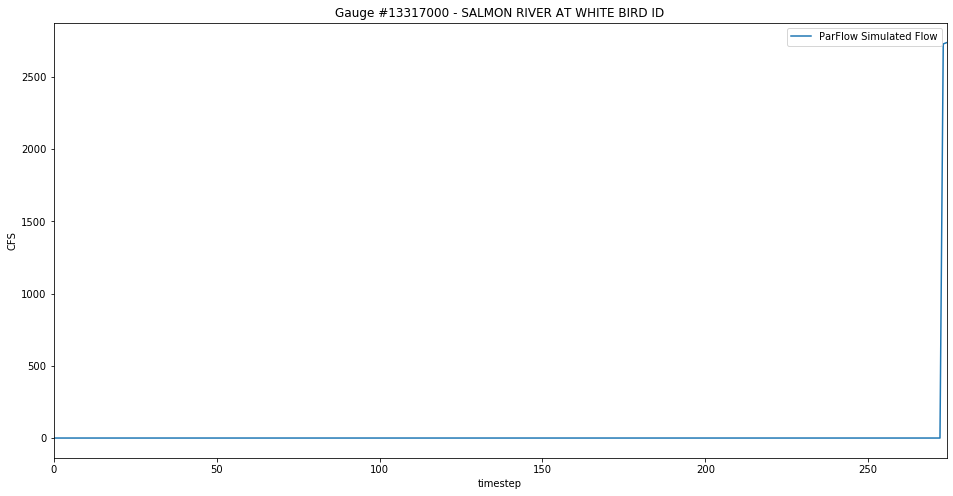

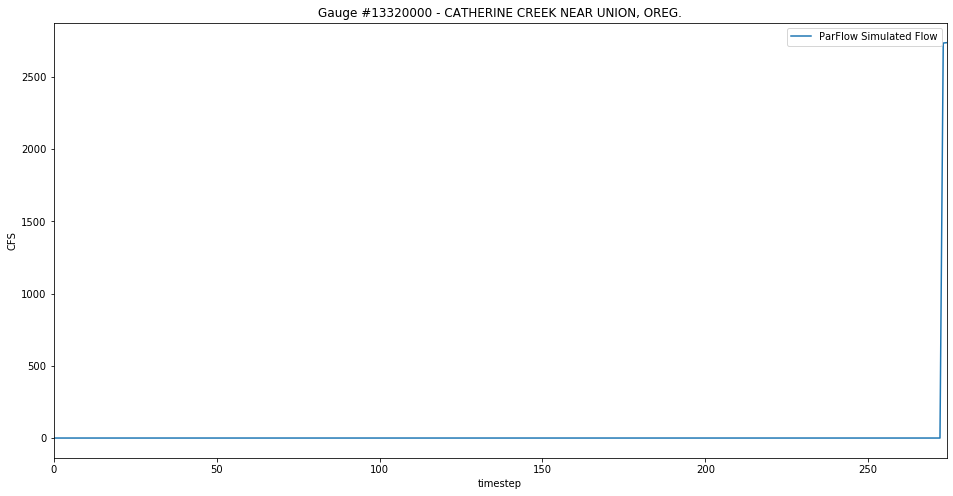

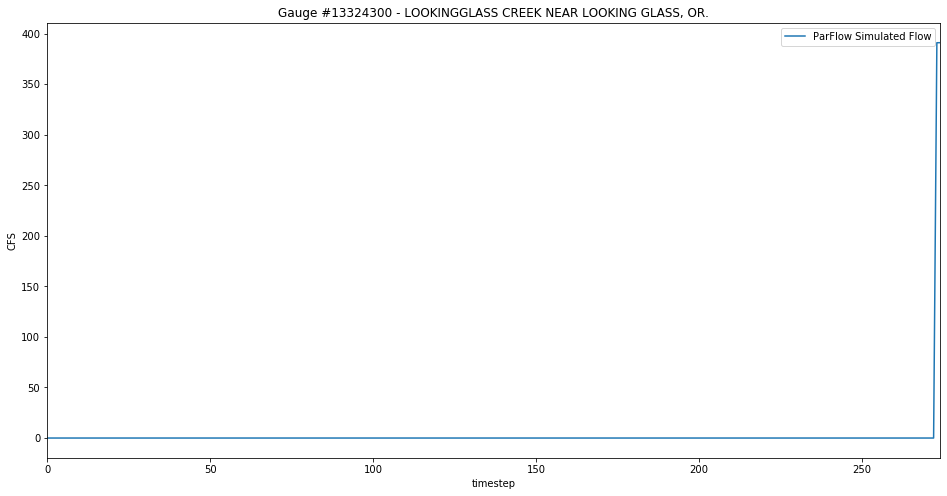

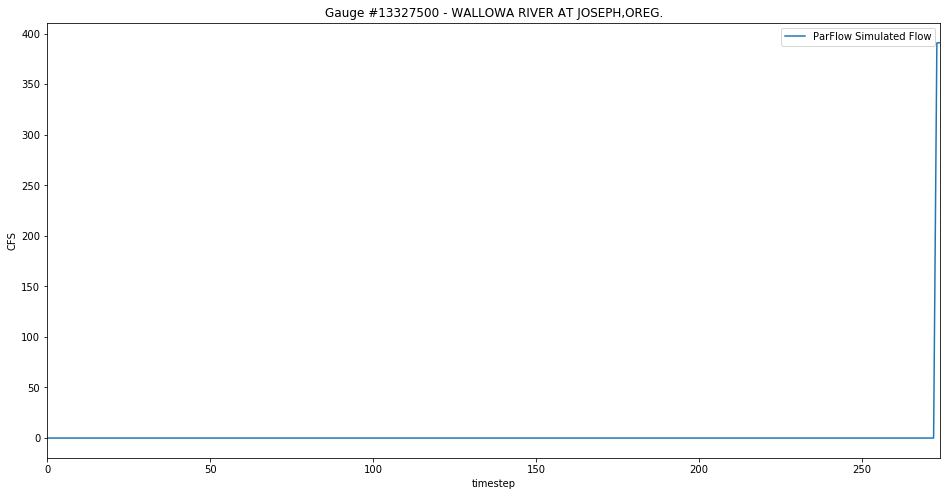

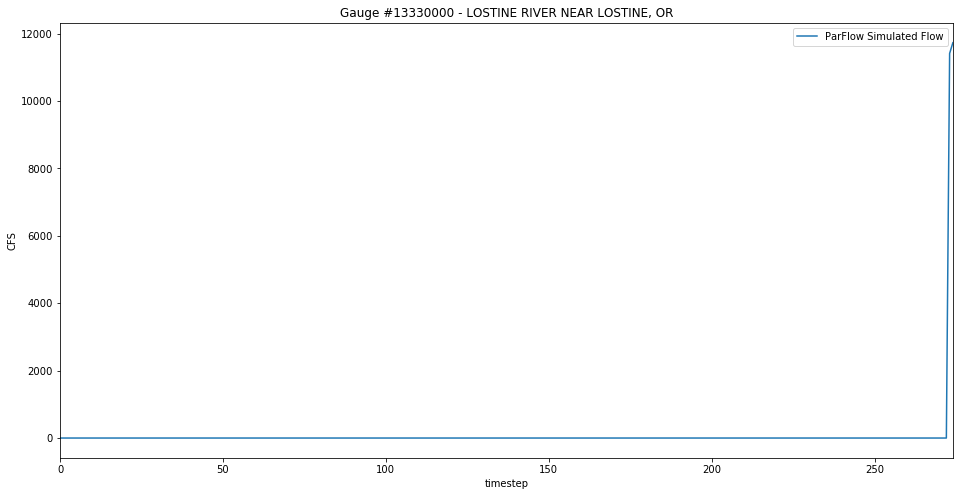

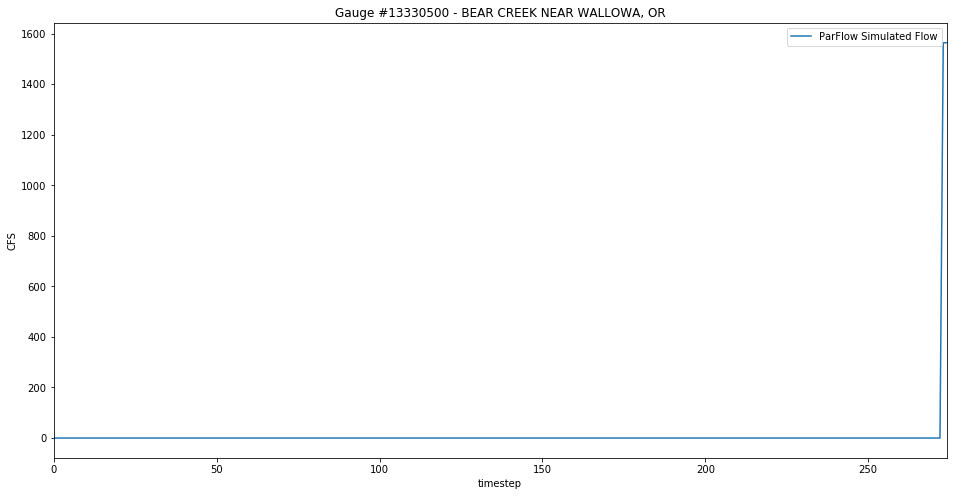

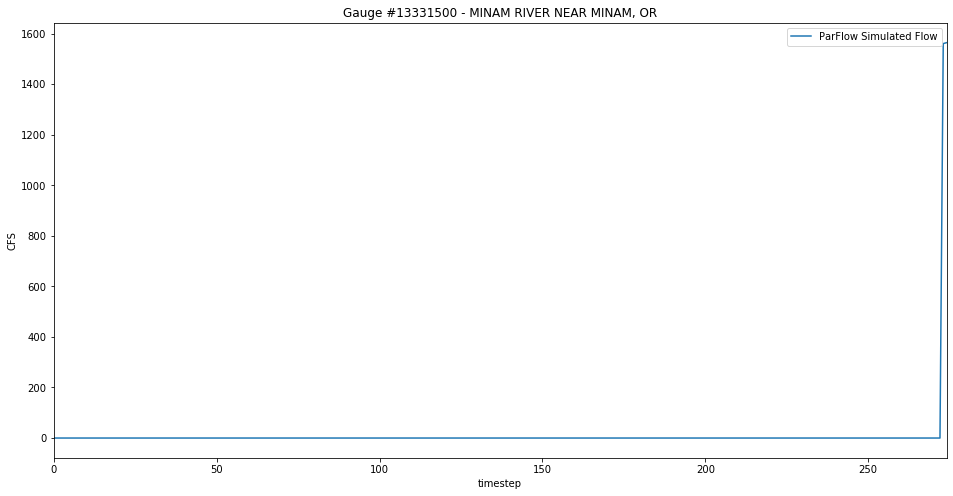

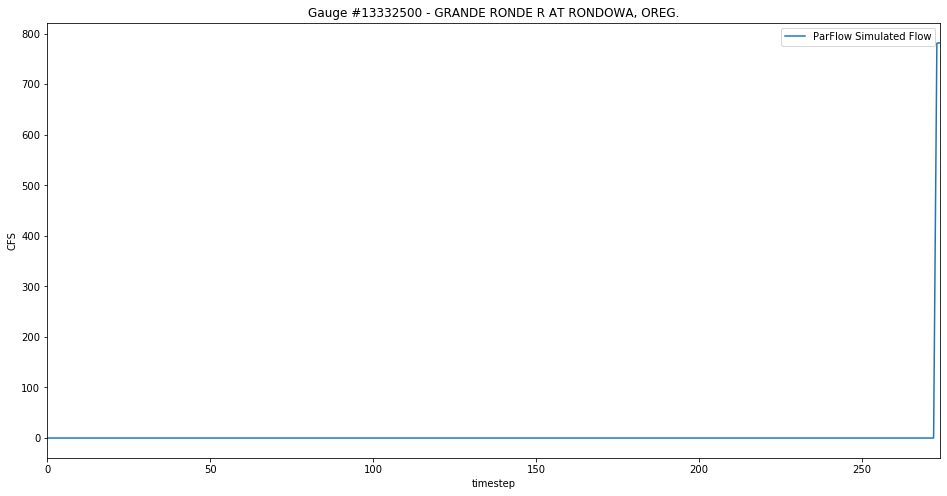

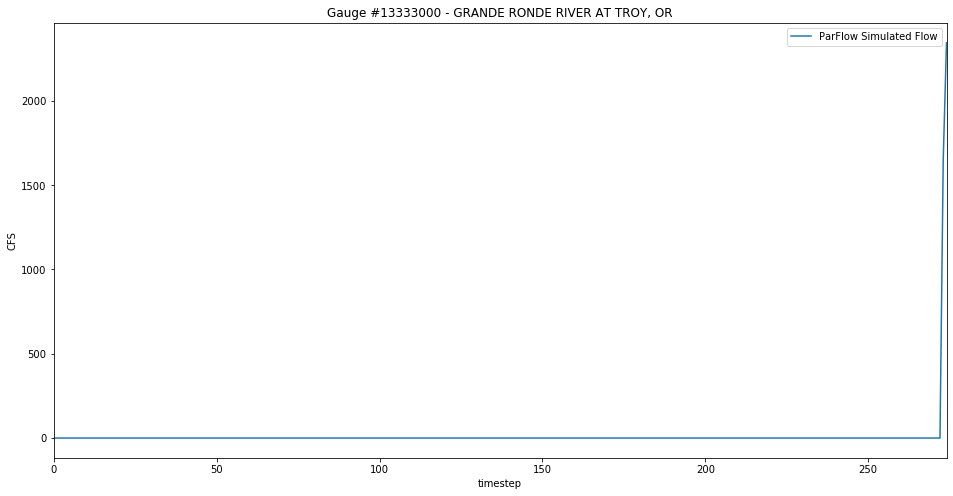

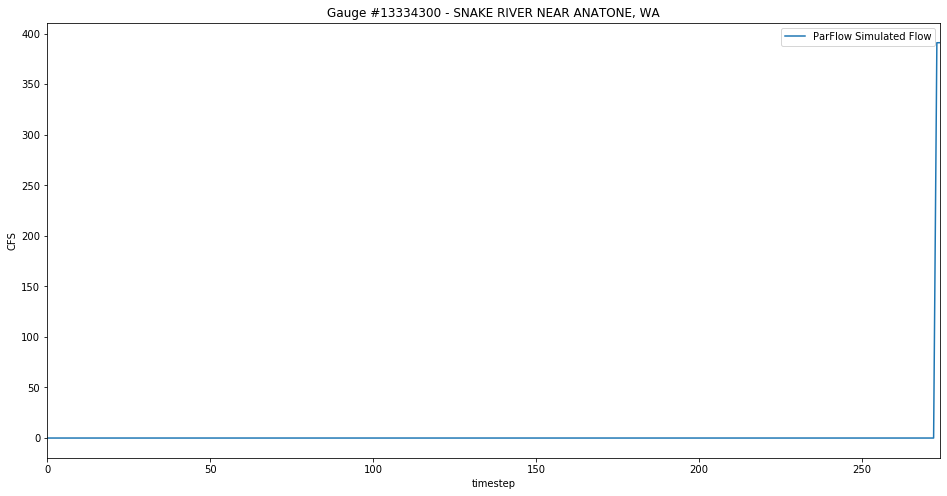

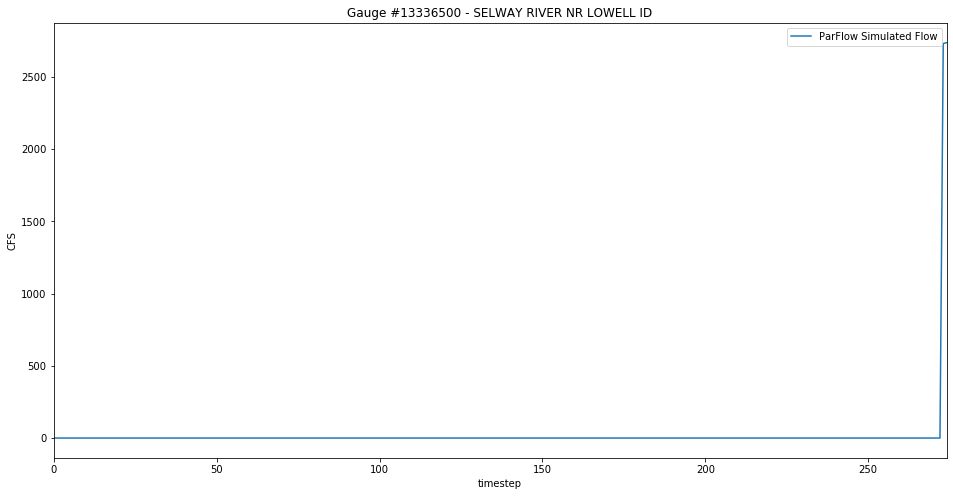

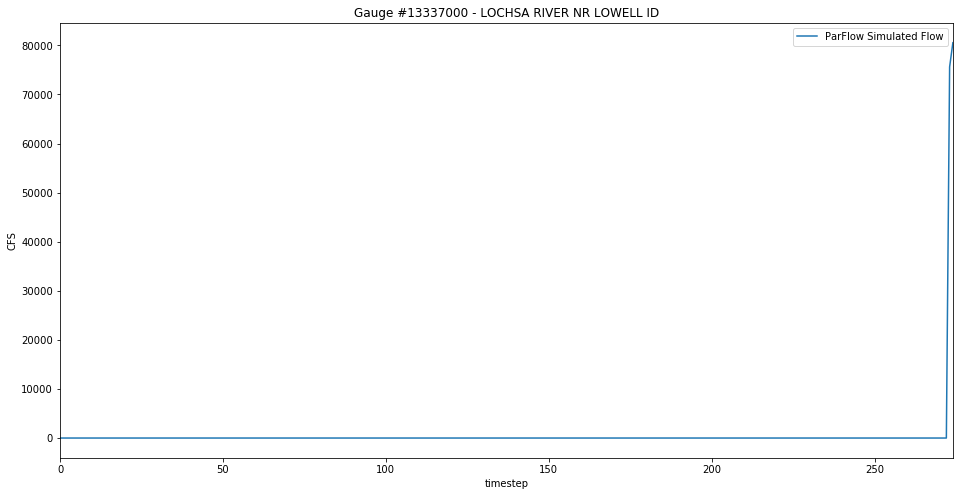

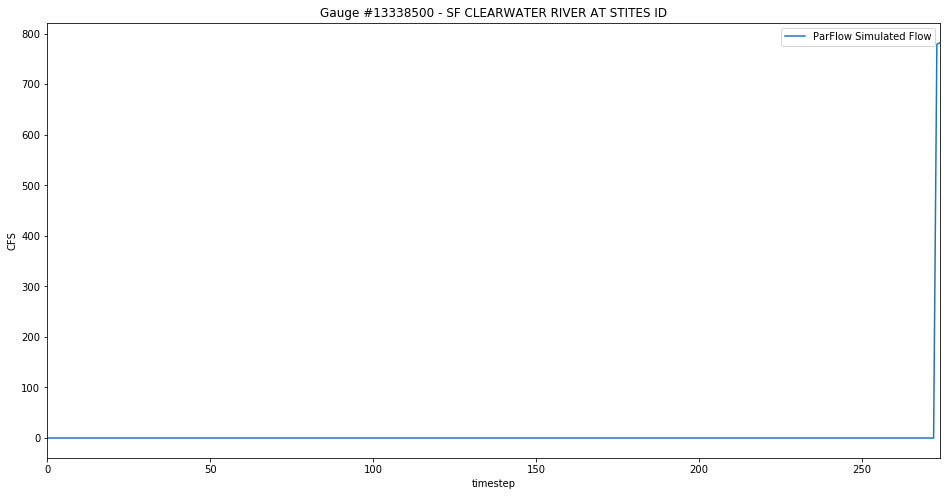

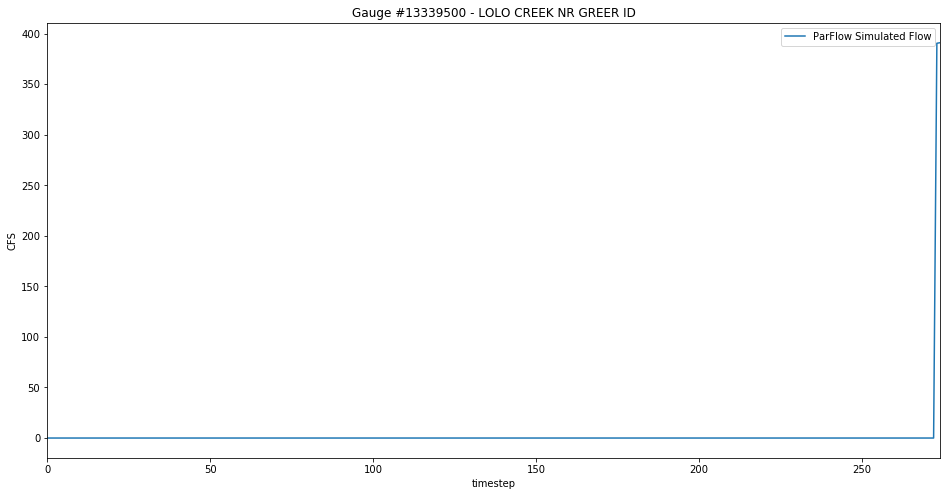

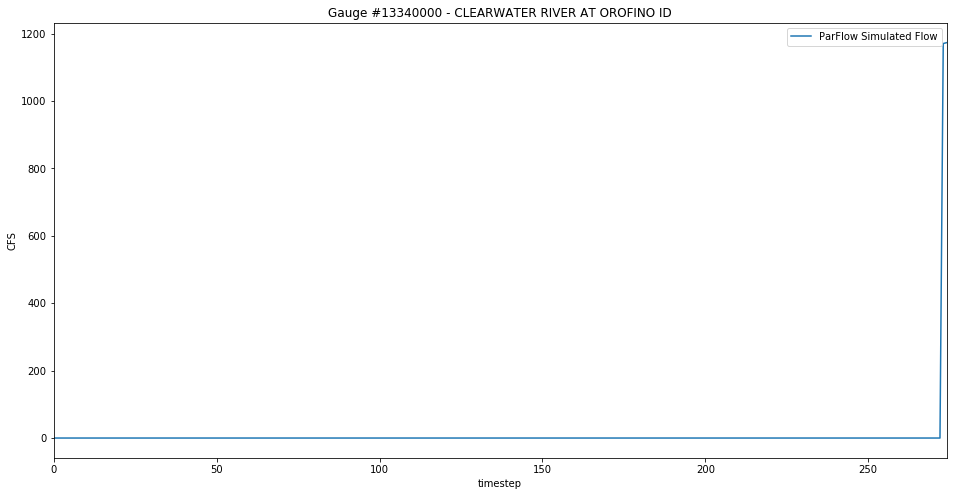

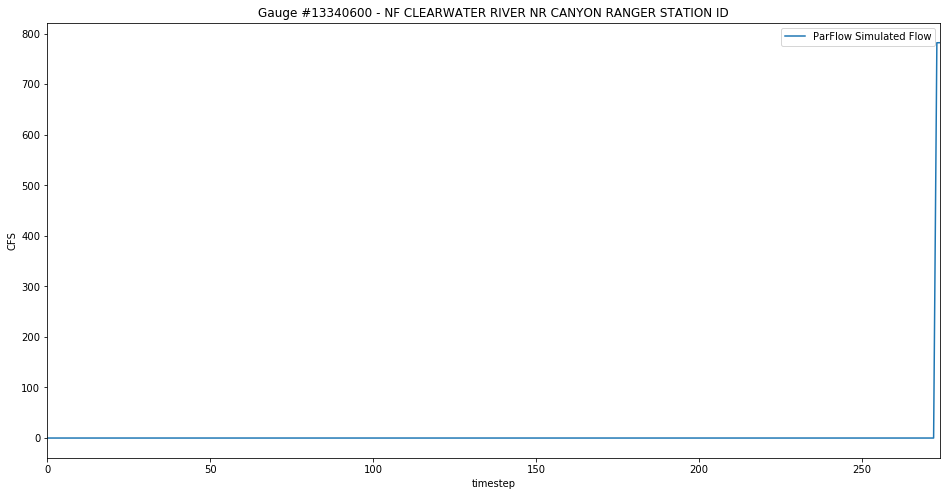

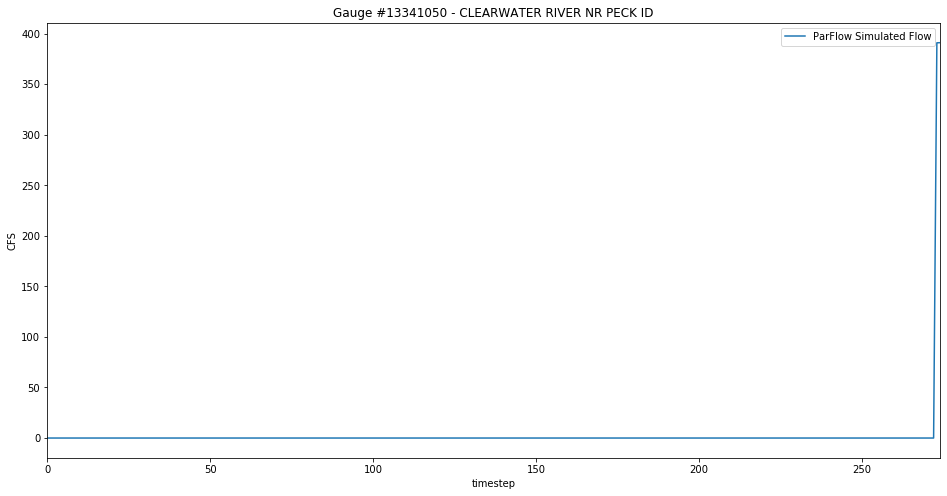

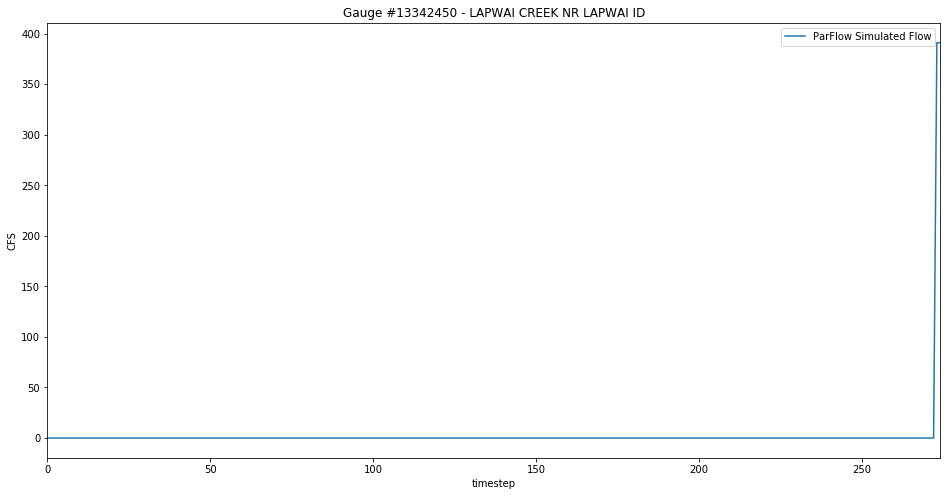

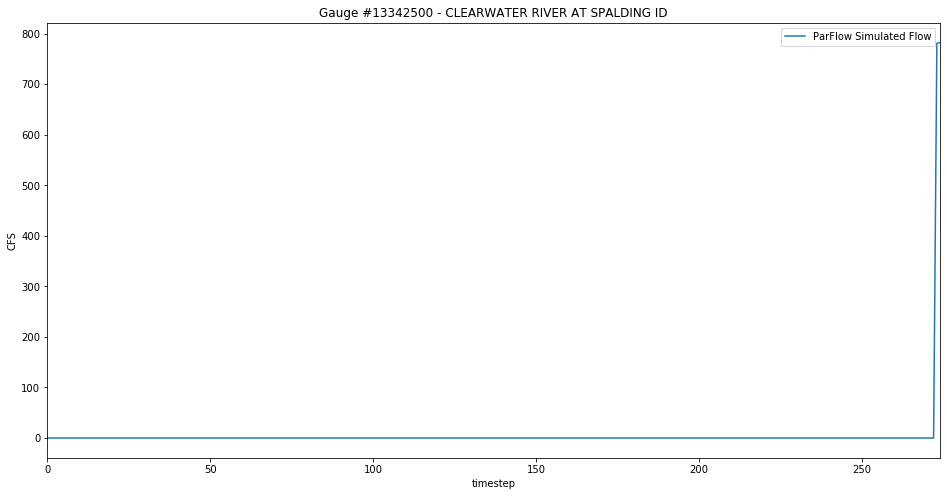

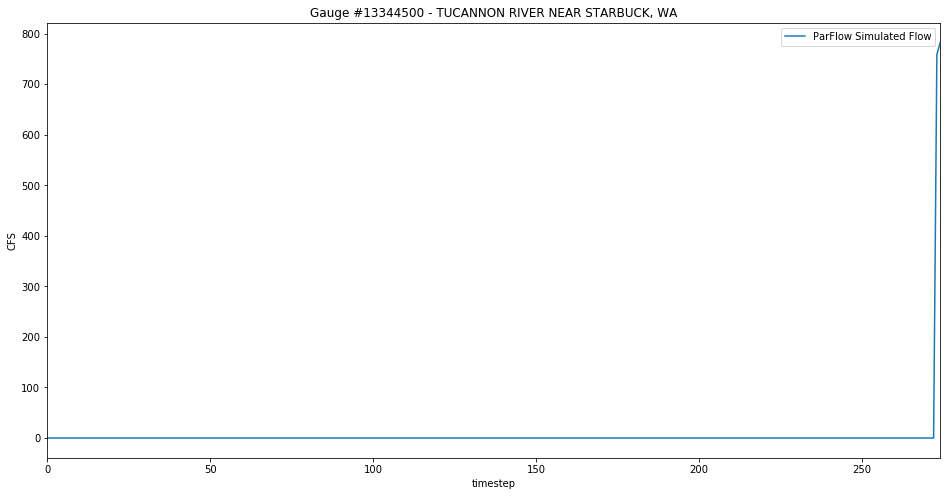

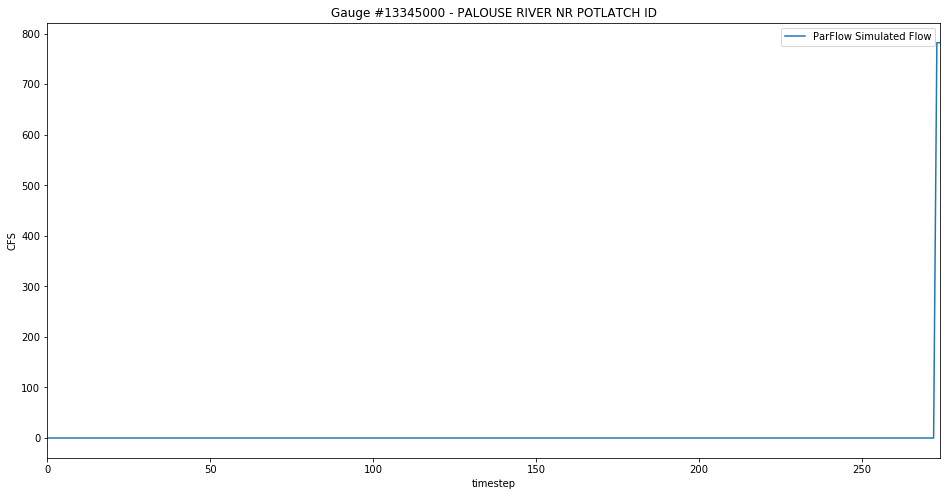

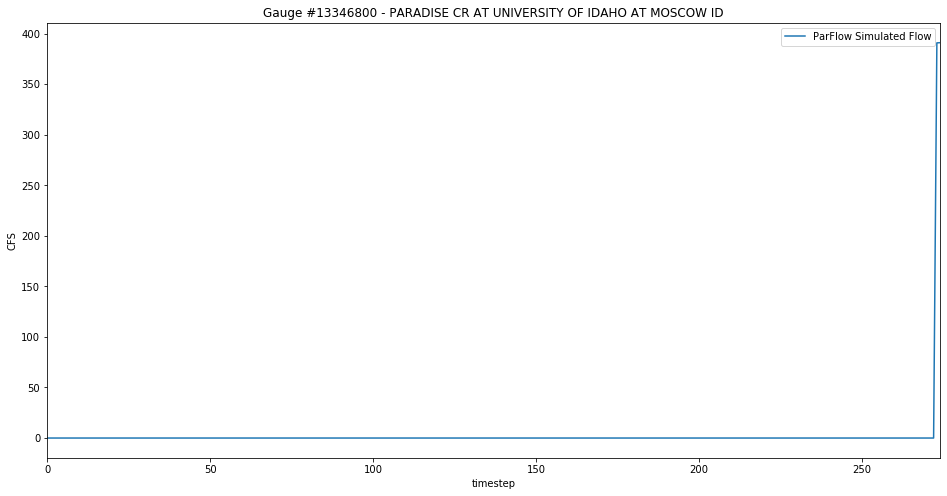

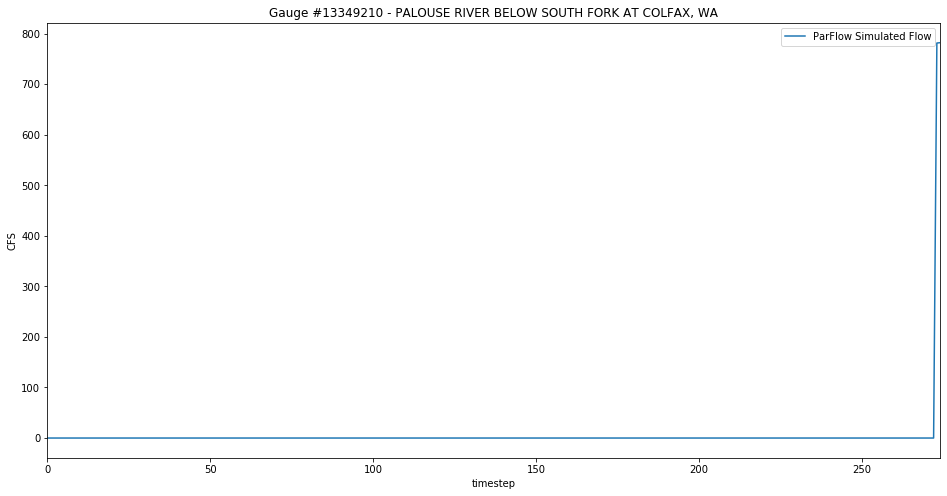

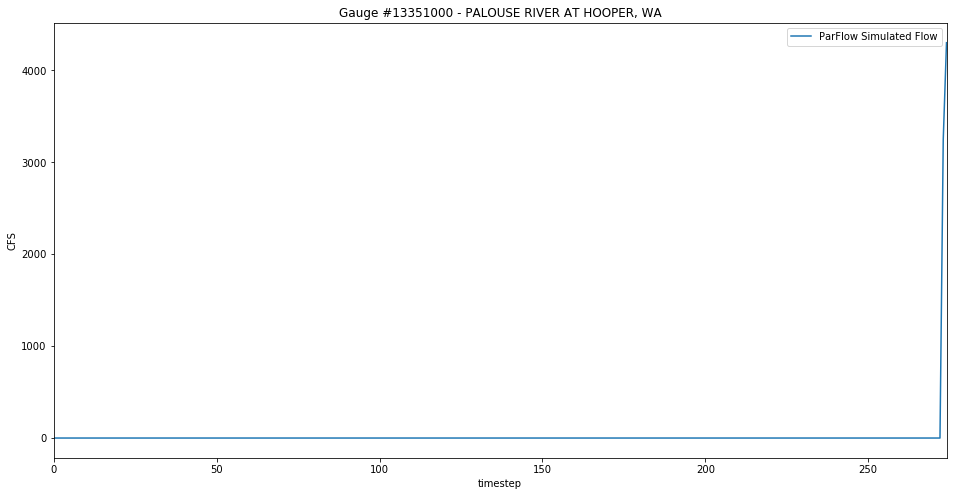

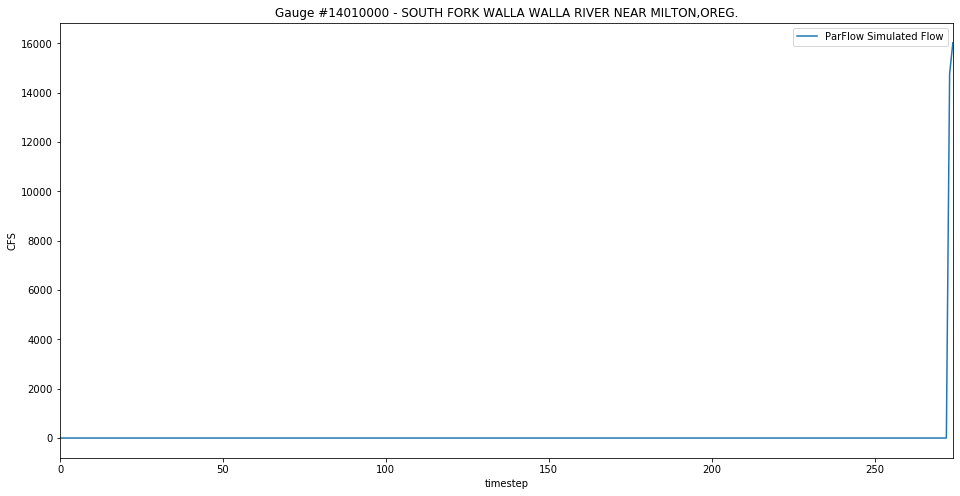

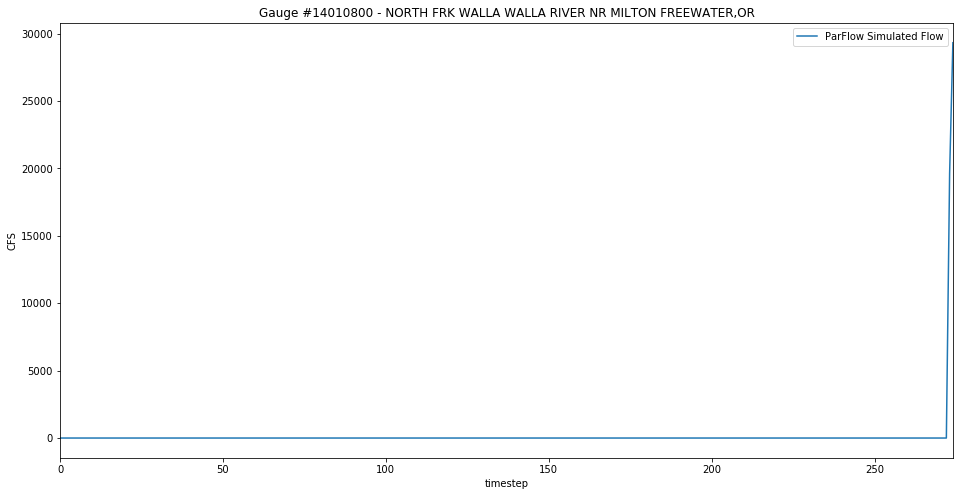

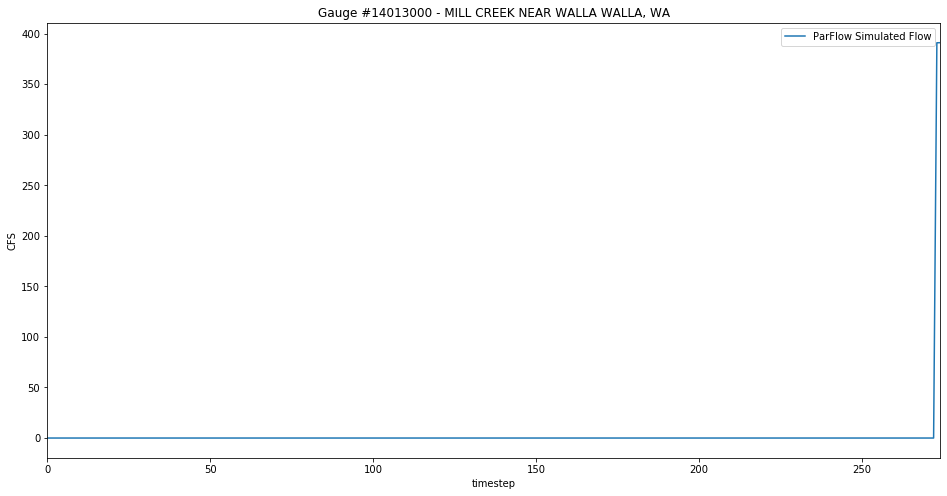

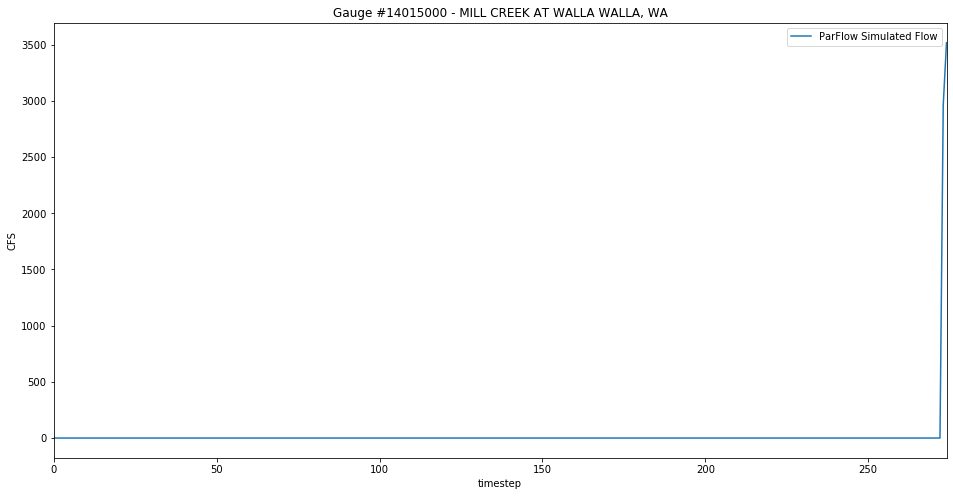

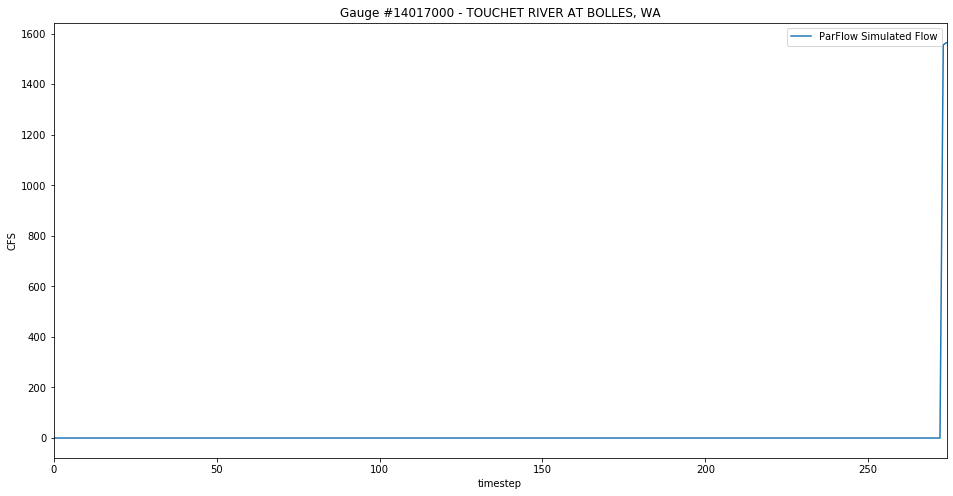

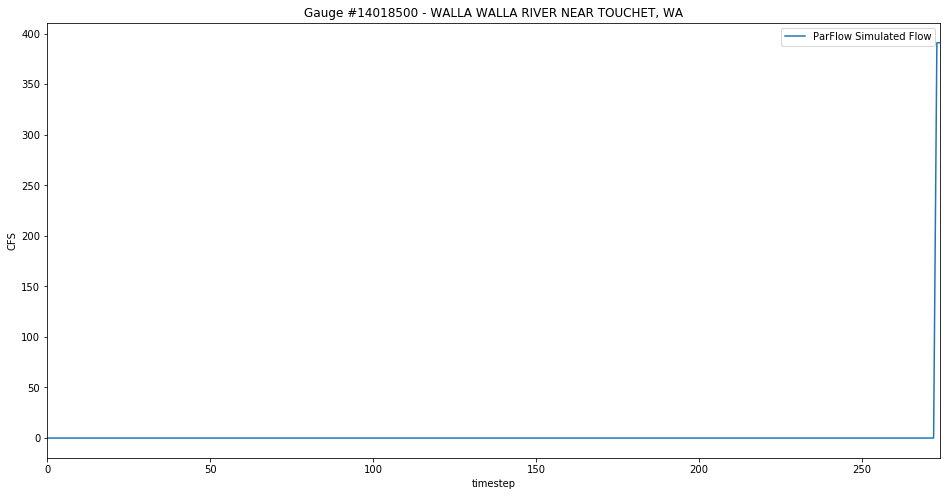

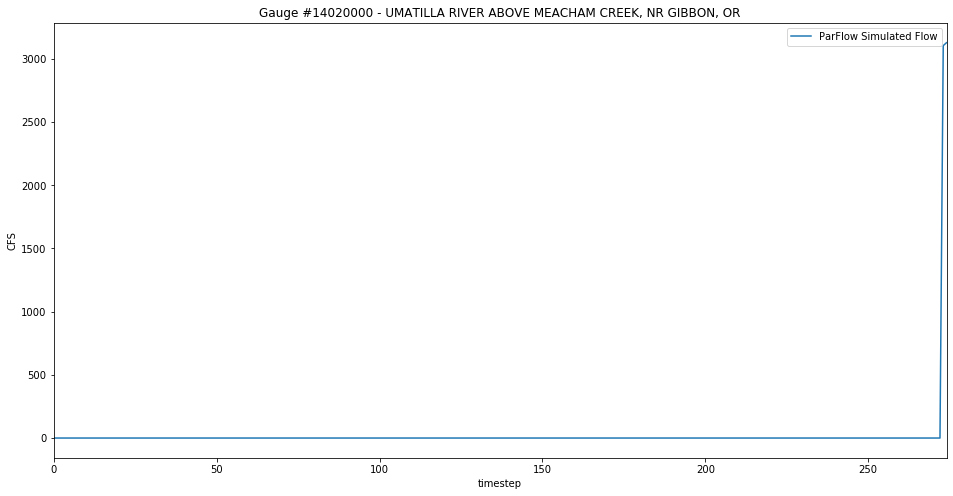

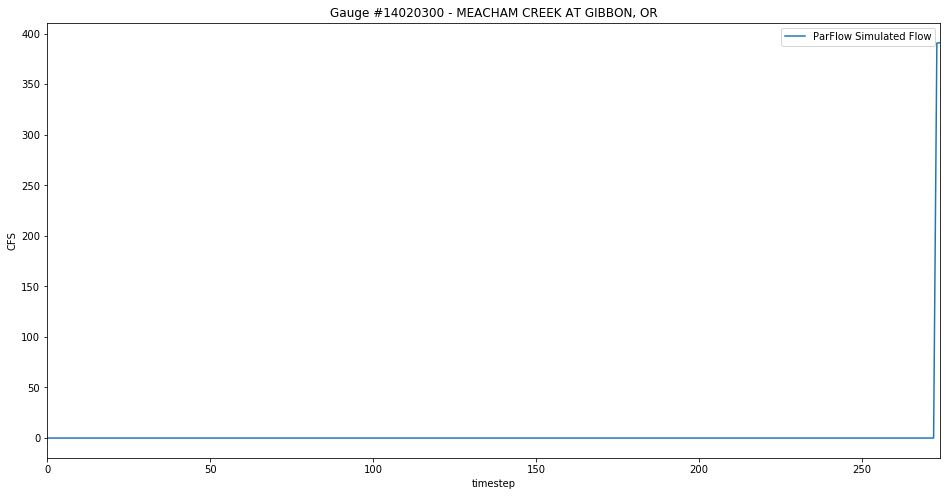

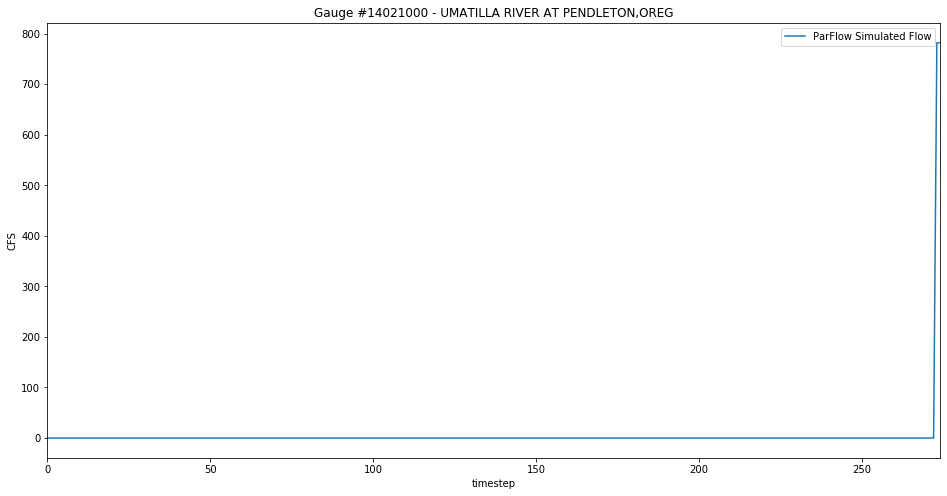

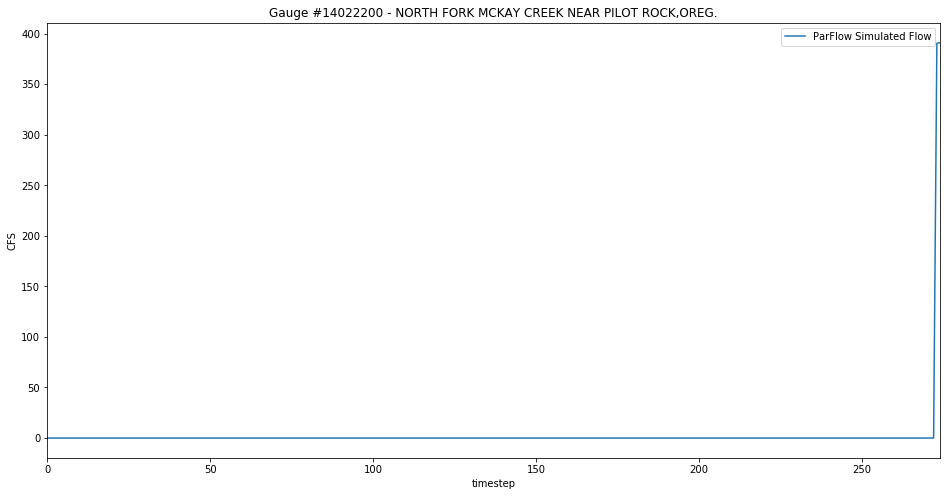

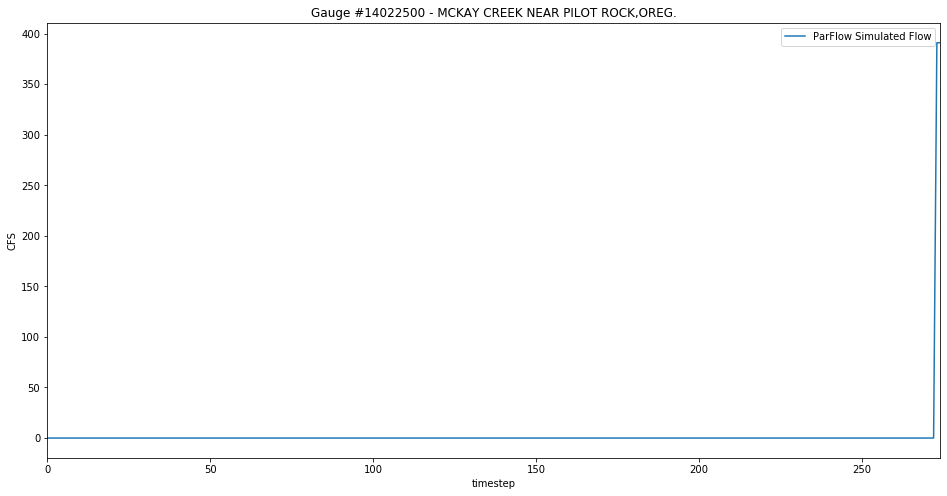

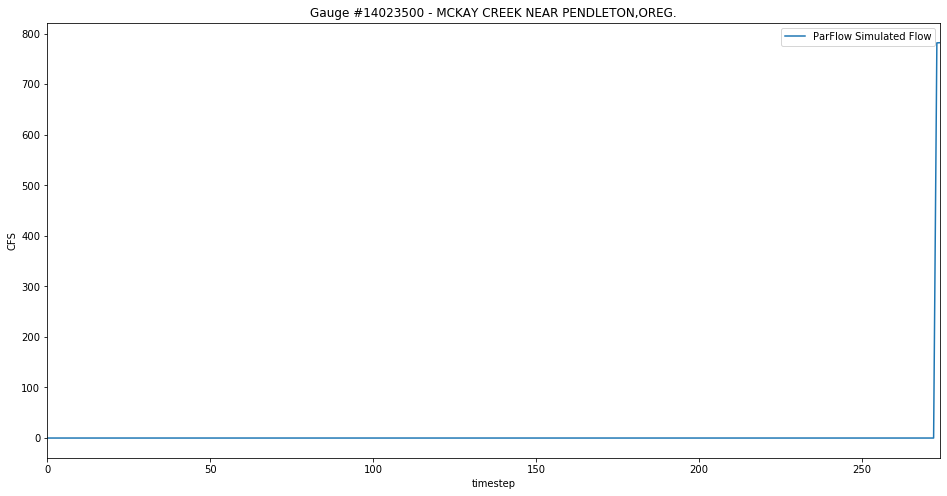

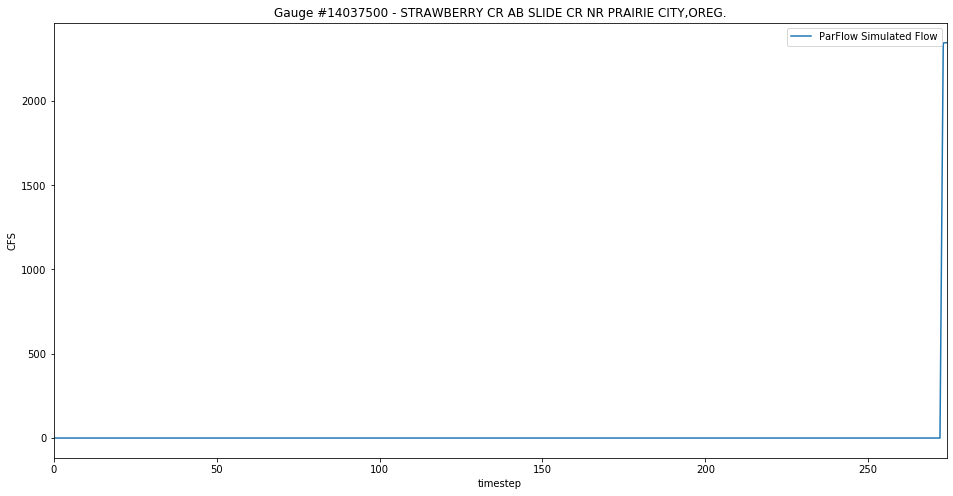

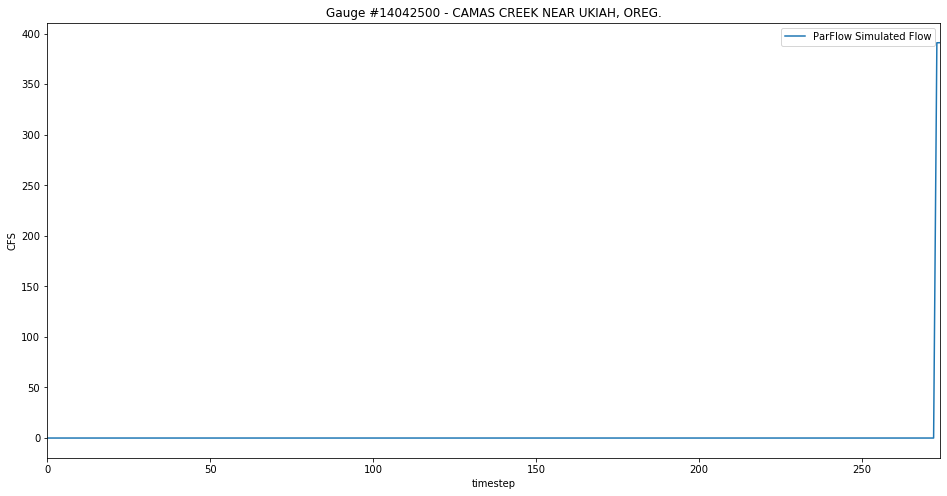

In [32]:
parflow_plots = [df.plot(x='timestep', y='flow_cfs', kind='line', figsize=(16,8), title=f'Gauge #{df.STAID[0]} - {df.STANAME[0]}', label='ParFlow Simulated Flow') for df in parflow_dataframes]
for plot in parflow_plots:
    plot.set_ylabel('CFS')
    fig=plot.get_figure()
    fig.savefig(os.path.join(PATH_TO_WRITE_PNGS,f'{plot.get_title()}.png'))
    plot